In [35]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
# grid search: set different ranges of parameters
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler # normalizations
from imblearn.over_sampling import SMOTE # imbalance dataset
# DecisionTreeClassifier, ,plot tree,export tree
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text,export_graphviz 
import graphviz # draw plot
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
import math
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
import random


## 1. load data

In [36]:
F_original = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
T = 'area'
ff = pd.read_csv("./forestfires.csv")
ff

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

In [37]:
ff.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [38]:
ff[T] = np.log1p(ff[T])
ff

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain      area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  0.000000
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  0.000000
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  0.000000
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  0.000000
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  0.000000
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...       ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  2.006871
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  4.012592
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  2.498152
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  0.000000
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  0.000000

[517 rows x 13 columns]

In [39]:
max(ff[T]) 

6.995619625423205

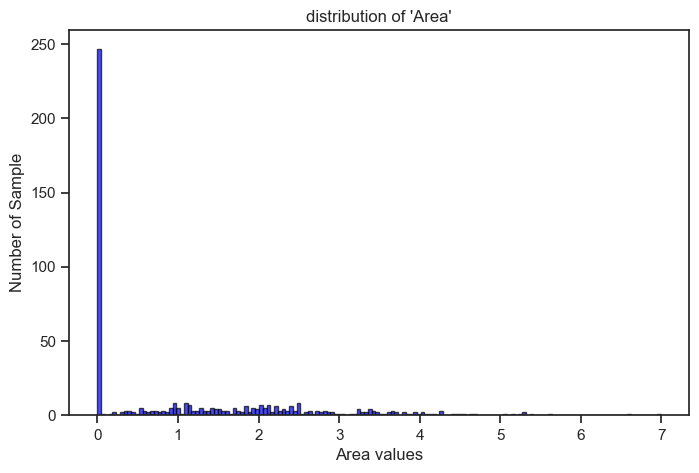

In [40]:
plt.figure(figsize=(8, 5))
plt.hist(ff[T], bins=150, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Area values")
plt.ylabel("Number of Sample")
plt.title("distribution of 'Area'")
plt.show()


## 2.feature engineering

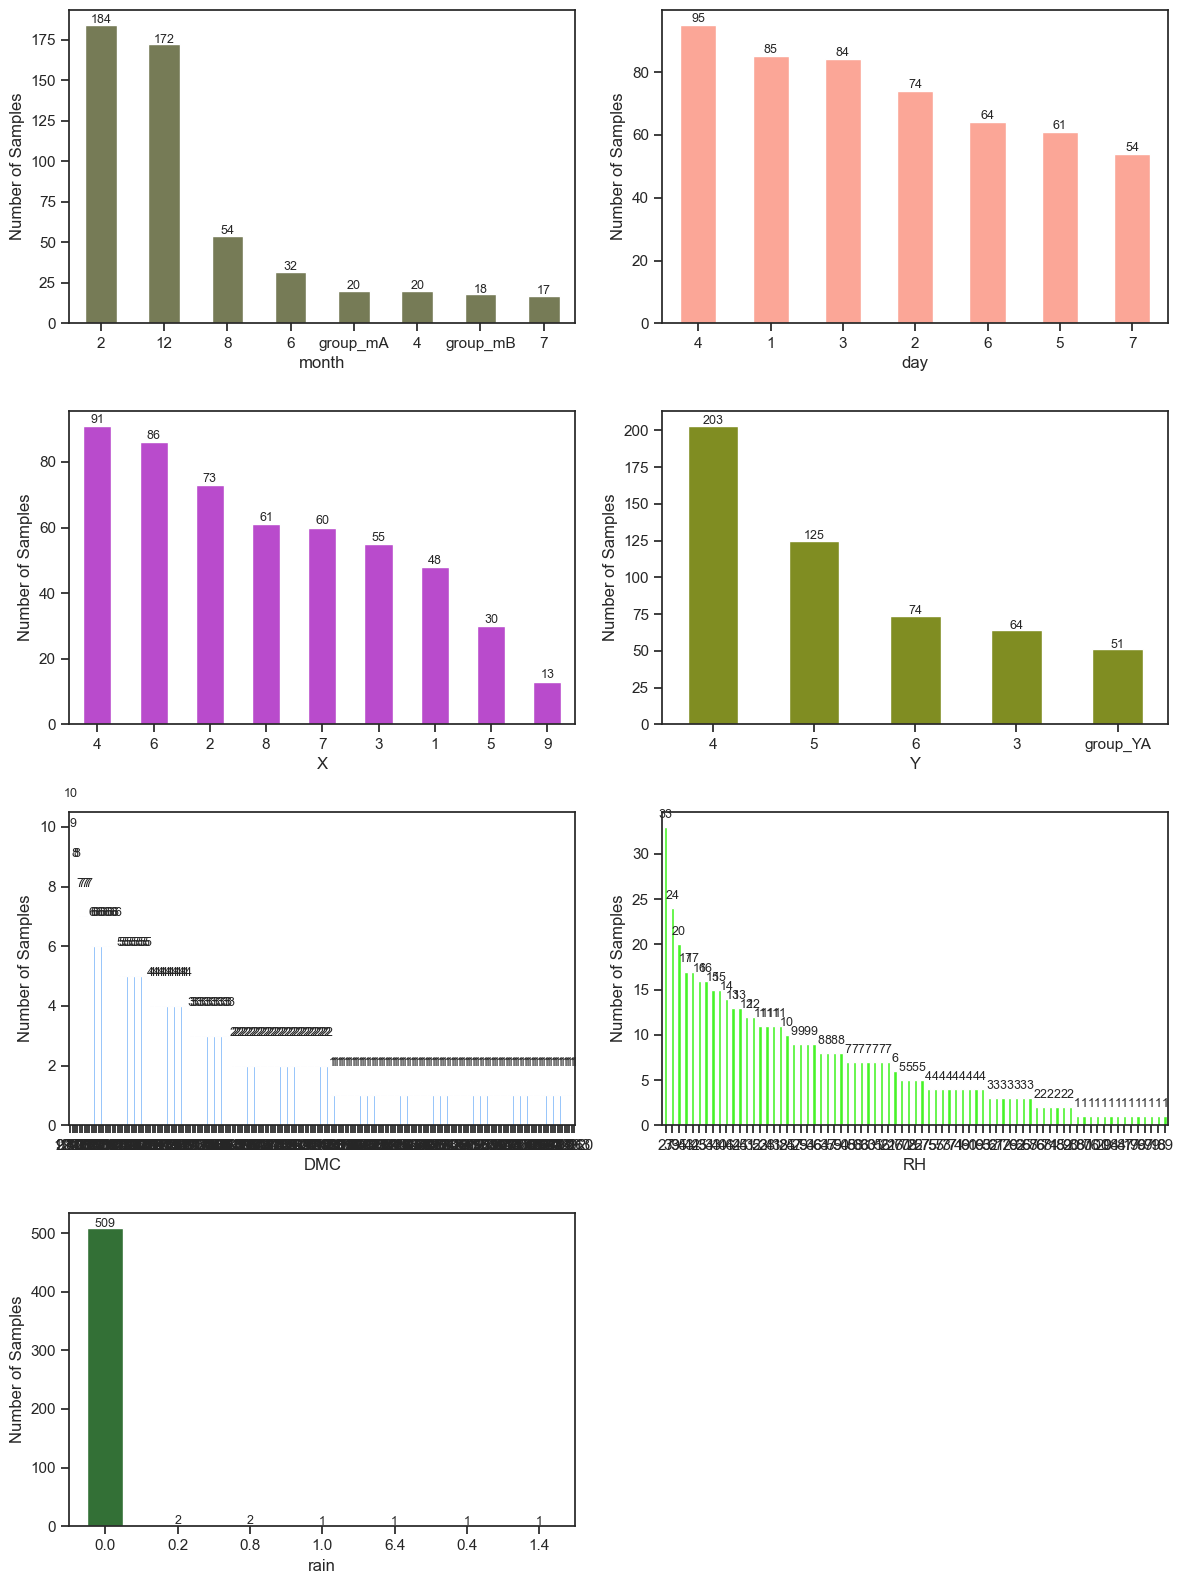

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'month_2', 'month_4', 'month_6', 'month_7', 'month_8', 'month_12',
       'month_group_mA', 'month_group_mB', 'day_1', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'day_7', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6',
       'X_7', 'X_8', 'X_9', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_group_YA'],
      dtype='object')
38


FFMC    DMC     DC   ISI  temp  RH  wind  rain      area  month_2  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  0.000000        0  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  0.000000        0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  0.000000        0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  0.000000        0  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  0.000000        0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...       ...      ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  2.006871        1  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  4.012592        1  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  2.498152        1  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  0.000000        1  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  0.000000        0  ...   

     X_5  X_6  X_7  X_8  X_9  Y_3  Y_4  Y_5  Y_6  Y_group_YA  
0      0    0    1    0    0    0    0    1    0           0  
1      0    0    1    0    0    0    1    0    0           0  
2      0    0    1    0    0    0    1    0    0           0  
3      0    0    0    1    0    0    0    0    1           0  
4      0    0    0    1    0    0    0    0    1           0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...         ...  
512    0    0    0    0    0    1    0    0    0           0  
513    0    0    0    0    0    0    1    0    0           0  
514    0    0    1    0    0    0    1    0    0           0  
515    0    0    0    0    0    0    1    0    0           0  
516    0    1    0    0    0    1    0    0    0           0  

[517 rows x 38 columns]

In [41]:
# find all discrete features
ff_tmp = ff.copy()
ff_tmp['month'] = pd.Categorical(ff_tmp['month']).codes + 1
ff_tmp['day'] = pd.Categorical(ff_tmp['day']).codes + 1

#  Discrete Feature Spare Elements Binning
# 创建映射关系，合并类别
month_mapping = {
    11: 'group_mA', 5: 'group_mA', 9: 'group_mA', 10: 'group_mA',  # 11, 5, 9, 10 合并为 "group_A"
    1: 'group_mB', 3: 'group_mB'  # 1, 3 合并为 "group_B"
}

Y_mapping = {
    2: 'group_YA', 8: 'group_YA', 9: 'group_YA'
}

ff_tmp['month'] = ff_tmp['month'].replace(month_mapping)
ff_tmp['Y'] = ff_tmp['Y'].replace(Y_mapping)


cate_features = ['month', 'day']
integer_features = ['X', 'Y', 'DMC', 'RH', 'rain']
seem_discrete_features = cate_features + integer_features
seem_discrete_features_counts = {feat: ff_tmp[feat].value_counts() for feat in seem_discrete_features}


# 计算子图行数（每行 2 列，向上取整）
num_plots = len(seem_discrete_features_counts)
num_rows = math.ceil(num_plots / 2)

# 创建子图
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # 让 2D 变成 1D，方便遍历

# 定义一个函数，在柱子上方标注数值
def add_labels(ax, data):
    for idx, value in enumerate(data):
        ax.text(idx, value + 1, str(value), ha='center', fontsize=9)

# 生成随机颜色
colors = [(random.random(), random.random(), random.random()) for _ in range(len(seem_discrete_features_counts))]

# 遍历字典，同时填充子图
for ax, (title, data), color in zip(axes, seem_discrete_features_counts.items(), colors):
    data.plot(kind='bar', ax=ax, color=color)  
    ax.set_xlabel(title)
    ax.set_ylabel("Number of Samples")
    # ax.set_title(f"{title} Distribution")
    ax.tick_params(axis='x', rotation=0)
    add_labels(ax, data)

# 处理多余的空白子图
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# 调整布局
plt.tight_layout()
plt.show()


# by above anaysis, make sure that discrete features needing onehot encoding
real_discrete_features = [feat for feat in seem_discrete_features if feat not in ['DMC', 'RH', 'rain']]
onehot_features_list = real_discrete_features

# ff_tmp = ff.copy()
ff_oht = pd.get_dummies(ff_tmp, columns=onehot_features_list, prefix=onehot_features_list, dtype=int)
print(ff_oht.columns)
print(len(ff_oht.columns))
display(ff_oht)

In [42]:
print(ff['DMC'].value_counts())
print('*'*40)
print(ff['RH'].value_counts())

DMC
99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: count, Length: 215, dtype: int64
****************************************
RH
27    33
39    24
35    20
43    17
42    17
      ..
96     1
97     1
99     1
18     1
69     1
Name: count, Length: 75, dtype: int64


In [43]:
# describe the overiew of data
print(f'Data: shape={ff.shape}')
display(ff.describe())
display(ff.head())

Data: shape=(517, 13)


X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain        area  
count  517.000000  517.000000  517.000000  517.000000  517.000000  
mean    18.889168   44.288201    4.017602    0.021663    1.111026  
std      5.806625   16.317469    1.791653    0.295959    1.398436  
min      2.200000   15.000000    0.400000    0.000000    0.000000  
25%     15.500000   33.000000    2.700000    0.000000    0.000000  
50%     19.300000   42.000000    4.000000    0.000000    0.418710  
75%     22.800000   53.000000    4.900000    0.000000    2.024193  
max     33.300000  100.000000    9.400000    6.400000    6.995620

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

### reduce dimmension

In [44]:
ff_oht_tmp = ff_oht.copy()
ff_oht_tmp_feats_data = ff_oht_tmp[[col for col in list(ff_oht_tmp.columns) if col != T ]]
ff_oht_tmp_target_data = ff_oht_tmp[T]

real_continuous_features = [col for col in F_original if col not in (real_discrete_features + [T])]
columns_to_scale = real_continuous_features
columns_to_keep = [col for col in list(ff_oht_tmp.columns) if col not in (real_continuous_features + [T])]

scaler = StandardScaler()
X_4rd_scaled = scaler.fit_transform(ff_oht_tmp_feats_data[columns_to_scale])

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(ff_oht_tmp_feats_data[columns_to_scale])

# 转换为 DataFrame 并恢复列名
X_4rd_scaled_df = pd.DataFrame(X_4rd_scaled, columns=columns_to_scale, 
                           index = ff_oht_tmp_feats_data.index # recover orginal index!
                          )

# 保持不变的列
X_4rd_remaining_df = ff_oht_tmp_feats_data[columns_to_keep]

# 合并标准化后的数据和原始数据
X_4rd_final = pd.concat([X_4rd_scaled_df, X_4rd_remaining_df], axis=1)
# remove feature 'rain'
X_4rd_final = X_4rd_final.drop('rain', axis=1)

# 显示结果
print(X_4rd_final.shape)
print(X_4rd_final)



(517, 36)
         FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1   -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2   -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3    0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4   -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   
..        ...       ...       ...       ...       ...       ...       ...   
512 -1.640083 -0.846648  0.474768 -1.563460  1.536084 -0.753800 -0.736124   
513 -1.640083 -0.846648  0.474768 -1.563460  0.519019  1.638592  0.995798   
514 -1.640083 -0.846648  0.474768 -1.563460  0.398350  1.577248  1.498614   
515  0.680957  0.549003  0.269382  0.500176  1.156839 -0.140366 -0.009834   
516 -2.020879 -1.685913 -1.780442 -1.739089 -1.222058 -0.815143  0.269509   

     month_2  month_4  month_6  ...  X_5  X_6  X_7  X_8  X_9  Y_3

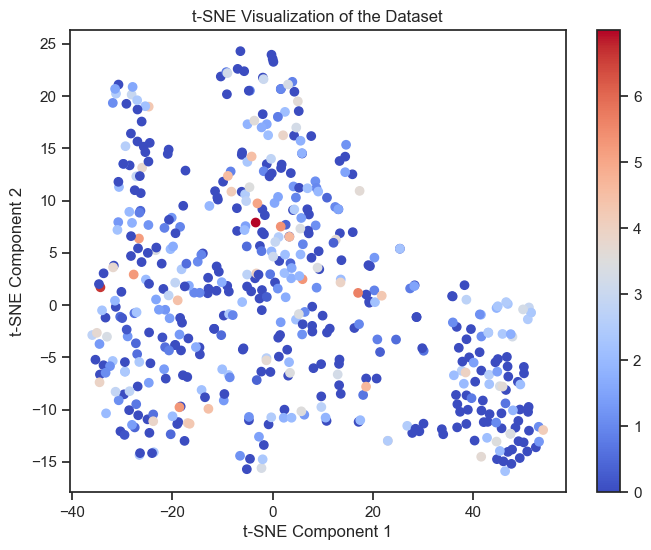

In [45]:
# **使用 tsne 进行降维**
tsne = TSNE(n_components=2,
            # metric = 'cosine',
            random_state=42, 
            perplexity=30 # numbers of neighbors
           )
X_tsne = tsne.fit_transform(X_4rd_final)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=ff_oht_tmp_target_data, cmap='coolwarm', alpha=1)
plt.colorbar(scatter) if ff_oht_tmp_target_data is not None else None  # 如果有分类标签，则显示颜色条
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
# plt.xlim(-50,60)
# plt.ylim(-25,35)
plt.title("t-SNE Visualization of the Dataset")
plt.show()

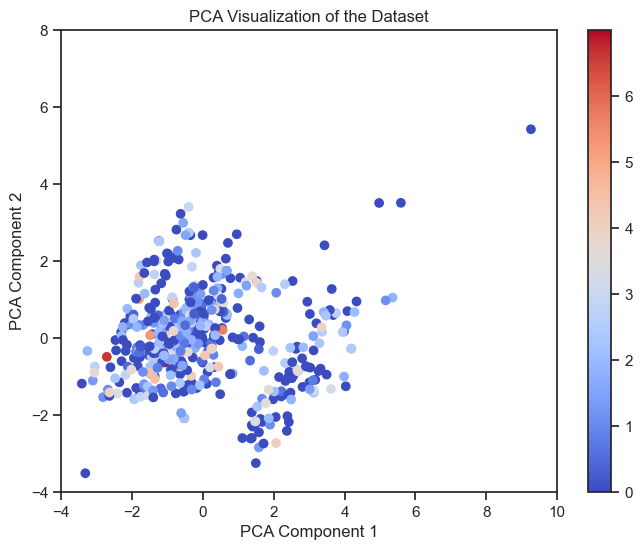

In [46]:
# **使用 PCA 进行降维**
pca = PCA(n_components=X_4rd_final.shape[1])  
X_pca = pca.fit_transform(X_4rd_final)
explained_variance = pca.explained_variance_ratio_
# print(f"Explained Variance: {explained_variance[0]*100:.2f}% + {explained_variance[1]*100:.2f}% = {sum(explained_variance)*100:.2f}%")


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ff_oht_tmp_target_data, cmap='coolwarm', alpha=1)
plt.colorbar(scatter) if ff_oht_tmp_target_data is not None else None  # 如果有分类标签，则显示颜色条
plt.xlim(-4, 10)  
plt.ylim(-4, 8)  
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of the Dataset")
plt.show()

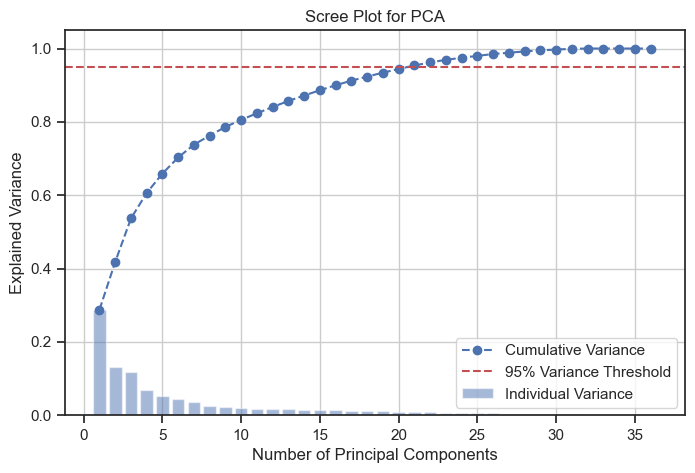

In [47]:
# **5️⃣  计算方差贡献**
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# **6️⃣  画 Scree Plot（碎石图）**
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label="Individual Variance")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")  # 设定阈值
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot for PCA")
plt.legend()
plt.grid()
plt.show()

In [48]:
# pca 95% cumulative variance
X_pca_selected = X_pca[:,:22]
X_pca_selected 

array([[ 3.32087236, -0.79198438,  1.09725429, ...,  0.34723435,
         0.12219124,  0.30354985],
       [ 0.24689077, -0.19750803, -1.80102233, ...,  0.07110637,
         0.48756464,  0.35432411],
       [ 0.4755112 , -0.05185363, -1.53667782, ...,  0.09916258,
         0.38466136,  0.39319332],
       ...,
       [ 1.6533953 ,  1.31830351,  0.56993414, ...,  0.09818703,
         0.05284576, -0.06788538],
       [-1.5021546 , -0.21270284,  0.20070228, ...,  0.41207115,
        -0.37123674, -0.5908049 ],
       [ 3.49128446, -0.94600808, -1.22932436, ..., -0.21400177,
         0.45664194,  0.31218242]])

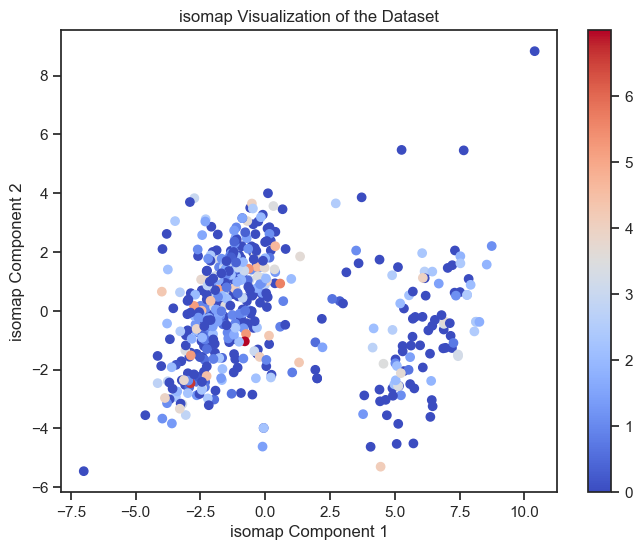

In [49]:
# Isomap
isomap = Isomap(n_components=X_4rd_final.shape[1],
                n_neighbors=30)
X_isomap = isomap.fit_transform(X_4rd_final)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=ff_oht_tmp_target_data, cmap='coolwarm', alpha=1)
plt.colorbar(scatter) if ff_oht_tmp_target_data is not None else None  # 如果有分类标签，则显示颜色条
# plt.xlim(-4, 10)  
# plt.ylim(-4, 8) 
plt.xlabel("isomap Component 1")
plt.ylabel("isomap Component 2")
plt.title("isomap Visualization of the Dataset")
plt.show()

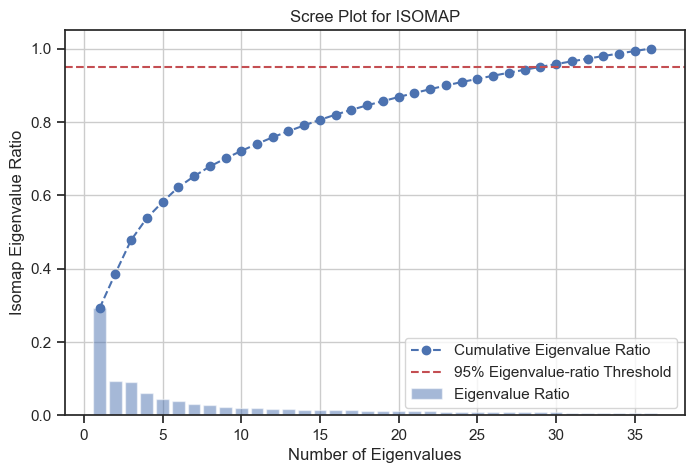

In [50]:
# **5️⃣  计算eigenvalues贡献**
isomap_evals = isomap.kernel_pca_.eigenvalues_
isomap_evals_ratios = [ev/sum(isomap_evals) for ev in isomap_evals]
cumulative_evals_ratios = np.cumsum(isomap_evals_ratios)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# **6️⃣  画 Scree Plot（碎石图）**
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(isomap_evals_ratios) + 1), cumulative_evals_ratios, marker='o', linestyle='--', label="Cumulative Eigenvalue Ratio")
plt.bar(range(1, len(isomap_evals_ratios) + 1), isomap_evals_ratios, alpha=0.5, label="Eigenvalue Ratio")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Eigenvalue-ratio Threshold")  # 设定阈值
plt.xlabel("Number of Eigenvalues")
plt.ylabel("Isomap Eigenvalue Ratio")
plt.title("Scree Plot for ISOMAP")
plt.legend()
plt.grid()
plt.show()

## train/test dataset split

In [51]:
X_4rd_final.shape

(517, 36)

In [52]:
# X_4rd_final, X_pca_selected 
X = X_4rd_final
# X = X_pca_selected
# X = X_pca[:,:24]
y = ff_oht_tmp_target_data 

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

## 8.2 KNN

Best k = 50


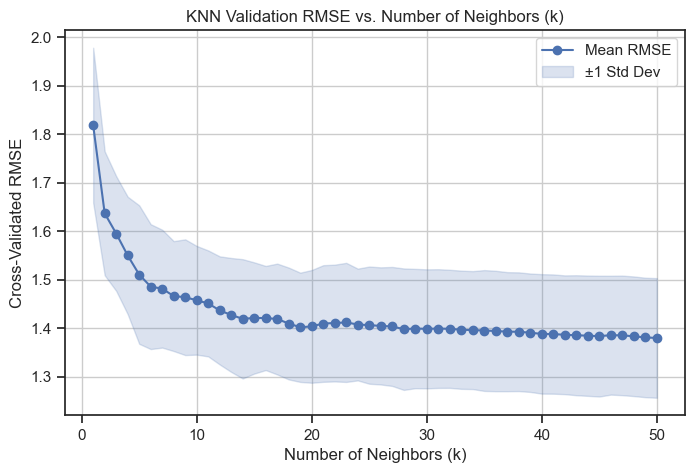

RMSE: 109.9197


In [53]:
# use orginal feature
X = X_4rd_final
y = ff_oht_tmp_target_data 

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

# k 值范围
k_values = range(1, 51)

cv_mean_scores = []  # 存储 RMSE 均值
cv_std_scores = []   # 存储 RMSE 标准差

for k in k_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)  # KNN 回归
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')  # 计算 RMSE
    scores = -scores  # 取反，使 RMSE 变为正值
    cv_mean_scores.append(scores.mean())  # 计算 RMSE 均值
    cv_std_scores.append(scores.std())    # 计算 RMSE 标准差

# 找到 RMSE 最小的 k
best_k = k_values[np.argmin(cv_mean_scores)]
print('Best k =', best_k)

# 可视化 RMSE 均值及其标准差
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_mean_scores, marker='o', linestyle='-', color='b', label='Mean RMSE')
plt.fill_between(k_values, 
                 np.array(cv_mean_scores) - np.array(cv_std_scores), 
                 np.array(cv_mean_scores) + np.array(cv_std_scores), 
                 color='b', alpha=0.2, label='±1 Std Dev')  # 添加误差范围

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated RMSE')
plt.title('KNN Validation RMSE vs. Number of Neighbors (k)')
plt.legend()
plt.grid()
plt.show()


knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))  # ✅ 计算 RMSE
print(f'RMSE: {rmse:.4f}')

Best k = 43


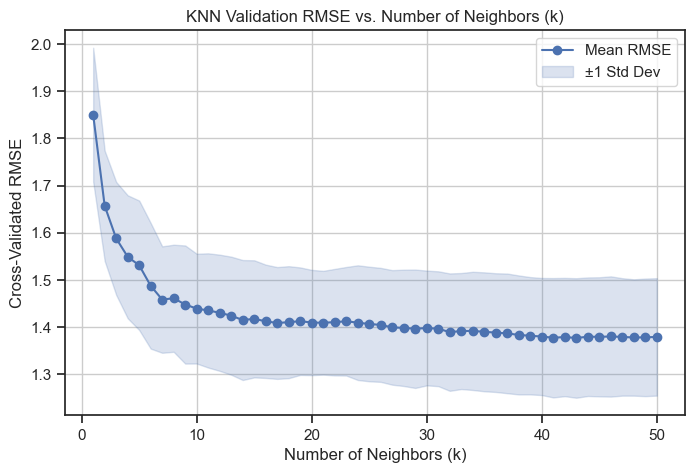

RMSE: 109.9316


In [54]:
# use pca feature
X = X_pca_selected
y = ff_oht_tmp_target_data 

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

# k 值范围
k_values = range(1, 51)

cv_mean_scores = []  # 存储 RMSE 均值
cv_std_scores = []   # 存储 RMSE 标准差

for k in k_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)  # KNN 回归
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')  # 计算 RMSE
    scores = -scores  # 取反，使 RMSE 变为正值
    cv_mean_scores.append(scores.mean())  # 计算 RMSE 均值
    cv_std_scores.append(scores.std())    # 计算 RMSE 标准差

# 找到 RMSE 最小的 k
best_k = k_values[np.argmin(cv_mean_scores)]
print('Best k =', best_k)

# 可视化 RMSE 均值及其标准差
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_mean_scores, marker='o', linestyle='-', color='b', label='Mean RMSE')
plt.fill_between(k_values, 
                 np.array(cv_mean_scores) - np.array(cv_std_scores), 
                 np.array(cv_mean_scores) + np.array(cv_std_scores), 
                 color='b', alpha=0.2, label='±1 Std Dev')  # 添加误差范围

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated RMSE')
plt.title('KNN Validation RMSE vs. Number of Neighbors (k)')
plt.legend()
plt.grid()
plt.show()

# use best k to fit knn on train dataset & predict on test dataset & eval
knn = neighbors.KNeighborsRegressor(n_neighbors= best_k,
                                     # weights='distance'
                                    )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))  # ✅ 计算 RMSE
print(f'RMSE: {rmse:.4f}')

ISOMAP dim for best testdata rmse: 36
ISOMAP best testdata rmse 109.796


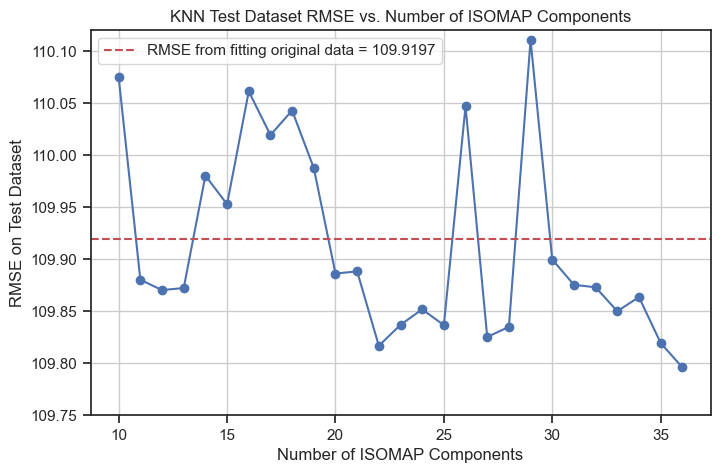

In [55]:
# use isomap feature
# find best isomap dim
y = ff_oht_tmp_target_data 

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 


n_component_list = []
rmse_list = []
for n in range(10,X_4rd_final.shape[1]+1):
    n_component_list.append(n)
    X_isomap_selected = X_isomap[:,:n]
    # X_isomap_selected = X_pca[:,:n] # if wanna see pca, use this
     
    X = X_isomap_selected
    y = ff_oht_tmp_target_data
    ran = 42 # gurantee there is same train dataset and test dataset
    train_size = .8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran)
    k_values = range(1, 51)  # k 值范围
    cv_scores = []
    
    for k in k_values:
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)  # KNN 回归
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')  # 使用 RMSE
        cv_scores.append(scores.mean())  # 记录平均 RMSE
    
    # 找到 RMSE 最高（负值最小，即误差最小）的 k
    best_k = k_values[np.argmax(cv_scores)]
    knn = neighbors.KNeighborsRegressor(n_neighbors= best_k,
                                     # weights='distance'
                                    )
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))  # ✅ 计算 RMSE
    rmse_list.append(round(rmse,4))
    
    # print(f'RMSE: {rmse:.4f}') 
  
# print(n_component_list)
# print(rmse_list)  
print('ISOMAP dim for best testdata rmse:',n_component_list[np.argmin(rmse_list)])
print('ISOMAP best testdata rmse',min(rmse_list))

# 画图
plt.figure(figsize=(8, 5))
plt.plot(n_component_list, rmse_list, marker='o', linestyle='-', color='b')
plt.axhline(y=109.9197, color='r', linestyle='--', label="RMSE from fitting original data = 109.9197")  # 设定阈值
plt.xlabel('Number of ISOMAP Components')
plt.ylabel('RMSE on Test Dataset')  # ✅ 修改 y 轴标签
plt.title('KNN Test Dataset RMSE vs. Number of ISOMAP Components')  # ✅ 修改标题
plt.ylim(109.75,110.12)
plt.legend()
plt.grid()
plt.show()    

### 8.3 RandomForestClassifier

In [56]:
# original feature + RF
X = X_4rd_final
y = ff_oht_tmp_target_data 

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 3, 5, 10, None],  
    'n_estimators': [10, 50, 100, 200]  
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))



# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# ✅ 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']
display(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']] \
    .sort_values(by='rank_test_score').rename(columns={'mean_test_score': 'mean_RMSE_CV', 'std_test_score': 'StandardDeviation_RMSE_CV'}))

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
print(f"rmse: {rmse:.4f}")

Best parameters: {'max_depth': 2, 'n_estimators': 200}
Best validation RMSE: 1.3833


params  mean_RMSE_CV  \
3      {'max_depth': 2, 'n_estimators': 200}      1.383342   
2      {'max_depth': 2, 'n_estimators': 100}      1.385121   
1       {'max_depth': 2, 'n_estimators': 50}      1.386916   
7      {'max_depth': 3, 'n_estimators': 200}      1.394542   
6      {'max_depth': 3, 'n_estimators': 100}      1.396054   
0       {'max_depth': 2, 'n_estimators': 10}      1.398331   
5       {'max_depth': 3, 'n_estimators': 50}      1.400818   
10     {'max_depth': 5, 'n_estimators': 100}      1.411732   
11     {'max_depth': 5, 'n_estimators': 200}      1.414798   
9       {'max_depth': 5, 'n_estimators': 50}      1.419161   
4       {'max_depth': 3, 'n_estimators': 10}      1.434096   
14    {'max_depth': 10, 'n_estimators': 100}      1.450279   
15    {'max_depth': 10, 'n_estimators': 200}      1.452876   
13     {'max_depth': 10, 'n_estimators': 50}      1.456034   
8       {'max_depth': 5, 'n_estimators': 10}      1.456480   
18  {'max_depth': None, 'n_estimators': 100}      1.462652   
19  {'max_depth': None, 'n_estimators': 200}      1.466176   
17   {'max_depth': None, 'n_estimators': 50}      1.475766   
12     {'max_depth': 10, 'n_estimators': 10}      1.507859   
16   {'max_depth': None, 'n_estimators': 10}      1.522723   

    StandardDeviation_RMSE_CV  rank_test_score  
3                    0.120525                1  
2                    0.122001                2  
1                    0.121873                3  
7                    0.123280                4  
6                    0.122909                5  
0                    0.111994                6  
5                    0.122481                7  
10                   0.127589                8  
11                   0.128937                9  
9                    0.127152               10  
4                    0.102876               11  
14                   0.124974               12  
15                   0.124864               13  
13                   0.121059               14  
8                    0.123558               15  
18                   0.125954               16  
19                   0.125750               17  
17                   0.124175               18  
12                   0.089472               19  
16                   0.107433               20

rmse: 109.9134


In [57]:
# pca feature + RF 
X = X_pca_selected
y = ff_oht_tmp_target_data 

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 3, 5, 10, None],  
    'n_estimators': [10, 50, 100, 200]  
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))



# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# ✅ 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']
display(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']] \
    .sort_values(by='rank_test_score').rename(columns={'mean_test_score': 'mean_RMSE_CV', 'std_test_score': 'StandardDeviation_RMSE_CV'}))

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
print(f"rmse: {rmse:.4f}")

Best parameters: {'max_depth': 2, 'n_estimators': 200}
Best validation RMSE: 1.3787


params  mean_RMSE_CV  \
3      {'max_depth': 2, 'n_estimators': 200}      1.378703   
2      {'max_depth': 2, 'n_estimators': 100}      1.378934   
1       {'max_depth': 2, 'n_estimators': 50}      1.379229   
7      {'max_depth': 3, 'n_estimators': 200}      1.384951   
6      {'max_depth': 3, 'n_estimators': 100}      1.385015   
0       {'max_depth': 2, 'n_estimators': 10}      1.385509   
5       {'max_depth': 3, 'n_estimators': 50}      1.386135   
4       {'max_depth': 3, 'n_estimators': 10}      1.389021   
10     {'max_depth': 5, 'n_estimators': 100}      1.392291   
11     {'max_depth': 5, 'n_estimators': 200}      1.392412   
9       {'max_depth': 5, 'n_estimators': 50}      1.395541   
8       {'max_depth': 5, 'n_estimators': 10}      1.409051   
15    {'max_depth': 10, 'n_estimators': 200}      1.418781   
19  {'max_depth': None, 'n_estimators': 200}      1.420924   
14    {'max_depth': 10, 'n_estimators': 100}      1.421844   
18  {'max_depth': None, 'n_estimators': 100}      1.423245   
13     {'max_depth': 10, 'n_estimators': 50}      1.430881   
17   {'max_depth': None, 'n_estimators': 50}      1.440876   
12     {'max_depth': 10, 'n_estimators': 10}      1.470339   
16   {'max_depth': None, 'n_estimators': 10}      1.482447   

    StandardDeviation_RMSE_CV  rank_test_score  
3                    0.112418                1  
2                    0.109677                2  
1                    0.112154                3  
7                    0.110268                4  
6                    0.109088                5  
0                    0.111832                6  
5                    0.107292                7  
4                    0.099430                8  
10                   0.120120                9  
11                   0.115908               10  
9                    0.114668               11  
8                    0.106308               12  
15                   0.125915               13  
19                   0.129762               14  
14                   0.128340               15  
18                   0.132552               16  
13                   0.112629               17  
17                   0.124905               18  
12                   0.108399               19  
16                   0.099782               20

rmse: 110.0096


In [58]:
# isomap + RF
# isomap find best dim and best rmse
rf_best_para_score = []
for n in range(10,X_4rd_final.shape[1]+1):
    RF_best = dict()
    RF_best['dim'] = n
    n_component_list.append(n)
    X_isomap_selected = X_isomap[:,:n]
    # X_isomap_selected = X_pca[:,:n]
    
    X = X_isomap_selected
    y = ff_oht_tmp_target_data
    ran = 42 # gurantee there is same train dataset and test dataset
    train_size = .8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran)
    k_values = range(1, 51)  # k 值范围
    cv_scores = []

    rfr = RandomForestRegressor(random_state=42)

    param_grid = {
        'max_depth': [2, 3, 5, 10, None],  
        'n_estimators': [10, 50, 100, 200]  
    }
    
    grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    RF_best['best RF para'] = grid_search.best_params_
    # print("Best parameters:", grid_search.best_params_)
    # print("Best validation RMSE:", round(-grid_search.best_score_, 4))
    
    # 结果存入 DataFrame
    results = pd.DataFrame(grid_search.cv_results_)
    best_rf = grid_search.best_estimator_
    
    y_pred = best_rf.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    # print(f"rmse: {rmse:.4f}")
    RF_best['RMSE on testdata'] = rmse
    
    # rmse_list.append(round(rmse,4))
    
    # print(f'RMSE: {rmse:.4f}') 
    rf_best_para_score.append(RF_best)
  
  
# print(rf_best_para_score)
minscore = 9999
best_dim = 0
best_para = dict()
for i in range(len(rf_best_para_score)):    
    if minscore > rf_best_para_score[i]['RMSE on testdata']:
        minscore = round(rf_best_para_score[i]['RMSE on testdata'],4)
        best_dim = rf_best_para_score[i]['dim']
        best_para = rf_best_para_score[i]['best RF para']

print(minscore)
print(best_dim)
print(best_para)

109.9051
33
{'max_depth': 2, 'n_estimators': 100}


## Gradient Tree Boosting

In [59]:
# gbr fitted on original feature 

X = X_4rd_final # original feature
y = ff_oht_tmp_target_data 

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 


# 初始化 GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# 定义超参数网格
param_grid = {
    'max_depth': [2, 3, 5, 10],  
    'n_estimators': [10, 50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2]  
}

# 交叉验证搜索最佳超参数
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数和验证集上的 RMSE
print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))

# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']

# 显示超参数调优结果
display(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
        .sort_values(by='rank_test_score')
        .rename(columns={'mean_test_score': 'mean_RMSE_CV', 'std_test_score': 'StandardDeviation_RMSE_CV'}))

# 选择最佳模型
best_gbr = grid_search.best_estimator_

# 在测试集上进行预测
y_pred = best_gbr.predict(X_test)

# 计算 RMSE（如果使用了 log1p，需要还原）
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
print(f"Test RMSE: {rmse:.4f}")


Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10}
Best validation RMSE: 1.3708


params  mean_RMSE_CV  \
0   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...      1.370819   
12  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...      1.371244   
4   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...      1.371469   
1   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...      1.372681   
8   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...      1.372894   
16  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...      1.375556   
2   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...      1.376083   
5   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...      1.382275   
3   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...      1.386666   
32  {'learning_rate': 0.2, 'max_depth': 2, 'n_esti...      1.390983   
6   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...      1.392526   
20  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...      1.393495   
9   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...      1.402727   
7   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...      1.414392   
13  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...      1.417220   
36  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...      1.421291   
17  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...      1.425067   
10  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...      1.430125   
24  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...      1.446682   
11  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...      1.467150   
18  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...      1.467378   
33  {'learning_rate': 0.2, 'max_depth': 2, 'n_esti...      1.478137   
40  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...      1.478485   
21  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...      1.480040   
14  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...      1.481327   
28  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...      1.494432   
37  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...      1.525065   
19  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...      1.526468   
22  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...      1.530033   
25  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...      1.541422   
34  {'learning_rate': 0.2, 'max_depth': 2, 'n_esti...      1.543422   
38  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...      1.574697   
15  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...      1.574910   
26  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...      1.585046   
35  {'learning_rate': 0.2, 'max_depth': 2, 'n_esti...      1.591442   
23  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...      1.596642   
44  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...      1.598458   
27  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...      1.610889   
41  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...      1.614028   
39  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...      1.629121   
45  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...      1.652229   
46  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...      1.652528   
47  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...      1.652531   
42  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...      1.653322   
29  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...      1.659142   
43  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...      1.661519   
30  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...      1.667555   
31  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...      1.668308   

    StandardDeviation_RMSE_CV  rank_test_score  
0                    0.119194                1  
12                   0.120332                2  
4                    0.118664                3  
1                    0.118697                4  
8                    0.116028                5  
16                   0.121518                6  
2                    0.119533                7  
5                    0.115267                8  
3                    0.124456                9  
32                   0.123409               10  
6                    0.11358

Test RMSE: 109.9847


In [60]:
# gbr fitted on X_pca_selected 

X = X_pca_selected # pca feature
y = ff_oht_tmp_target_data 

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 



# 初始化 GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# 定义超参数网格
param_grid = {
    'max_depth': [2, 3, 5, 10],  
    'n_estimators': [10, 50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2]  
}

# 交叉验证搜索最佳超参数
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数和验证集上的 RMSE
print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))

# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']

# 显示超参数调优结果
display(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
        .sort_values(by='rank_test_score')
        .rename(columns={'mean_test_score': 'mean_RMSE_CV', 'std_test_score': 'StandardDeviation_RMSE_CV'}))

# 选择最佳模型
best_gbr = grid_search.best_estimator_

# 在测试集上进行预测
y_pred = best_gbr.predict(X_test)

# 计算 RMSE（如果使用了 log1p，需要还原）
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
print(f"Test RMSE: {rmse:.4f}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10}
Best validation RMSE: 1.3649


params  mean_RMSE_CV  \
16  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...      1.364858   
2   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...      1.366243   
1   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...      1.368641   
5   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...      1.369495   
8   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...      1.369620   
4   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...      1.369661   
3   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...      1.370100   
20  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...      1.370314   
6   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...      1.370523   
12  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...      1.371141   
0   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...      1.371436   
9   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...      1.371916   
24  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...      1.375979   
7   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...      1.375985   
10  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...      1.383686   
32  {'learning_rate': 0.2, 'max_depth': 2, 'n_esti...      1.385809   
17  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...      1.391125   
11  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...      1.398334   
13  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...      1.400048   
40  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...      1.400221   
36  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...      1.401541   
21  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...      1.410028   
18  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...      1.419919   
22  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...      1.440968   
33  {'learning_rate': 0.2, 'max_depth': 2, 'n_esti...      1.445185   
14  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...      1.450119   
28  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...      1.456683   
19  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...      1.461961   
25  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...      1.462200   
37  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...      1.464736   
26  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...      1.486623   
23  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...      1.494697   
34  {'learning_rate': 0.2, 'max_depth': 2, 'n_esti...      1.495775   
41  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...      1.506514   
27  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...      1.506756   
15  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...      1.516337   
38  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...      1.526438   
42  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...      1.530981   
44  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...      1.531198   
43  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...      1.534589   
29  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...      1.537866   
30  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...      1.541615   
31  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...      1.541849   
35  {'learning_rate': 0.2, 'max_depth': 2, 'n_esti...      1.543433   
45  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...      1.557566   
46  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...      1.557971   
47  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...      1.557975   
39  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...      1.562248   

    StandardDeviation_RMSE_CV  rank_test_score  
16                   0.105562                1  
2                    0.104355                2  
1                    0.110672                3  
5                    0.111096                4  
8                    0.118823                5  
4                    0.117279                6  
3                    0.098091                7  
20                   0.102362                8  
6                    0.105267                9  
12                   0.119717               10  
0                    0.11849

Test RMSE: 109.9934


In [61]:
# gbr fitted on X_isomap 

gb_best_para_score = []  # 用于存储不同维度下的最佳超参数和 RMSE

for n in range(10, X_4rd_final.shape[1] + 1):
    GB_best = dict()
    GB_best['dim'] = n

    # 选择前 n 维的 Isomap 降维特征
    X_isomap_selected = X_isomap[:, :n]
    
    # 定义 X 和 y
    X = X_isomap_selected
    y = ff_oht_tmp_target_data

    # 设定随机种子，保证可复现
    ran = 42
    train_size = 0.8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=ran)

    # 定义 GradientBoostingRegressor
    gbr = GradientBoostingRegressor(random_state=42)

    # 定义超参数网格
    param_grid = {
        'max_depth': [2, 3, 5, 10],
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    # 使用 GridSearchCV 进行超参数搜索
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # 记录最佳参数
    GB_best['best GB para'] = grid_search.best_params_

    # 选择最佳模型
    best_gbr = grid_search.best_estimator_

    # 在测试集上进行预测
    y_pred = best_gbr.predict(X_test)

    # 计算 RMSE（如果 y 经过 log1p，需要 expm1 还原）
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    GB_best['RMSE on testdata'] = rmse

    # 记录当前维度下的最佳结果
    gb_best_para_score.append(GB_best)

# 输出最终的超参数和 RMSE 结果
# print(gb_best_para_score)
minscore = 9999
best_dim = 0
best_para = dict()
for i in range(len(gb_best_para_score)):    
    if minscore > gb_best_para_score[i]['RMSE on testdata']:
        minscore = round(gb_best_para_score[i]['RMSE on testdata'],4)
        best_dim = gb_best_para_score[i]['dim']
        best_para = gb_best_para_score[i]['best GB para']

print('best rmse:',minscore)
print('best_dim:',best_dim)
print(best_para)

best rmse: 109.8947
best_dim: 32
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}


# PART II: wine dataset

## 1. load data

In [62]:
#Columns/Features
# D+C: all feat, L: regression label
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("./winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("./winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_r= wine_r.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r]) # get all data for classification

## 2. explore & describe data

In [63]:
# describe the overiew of data
print(f'Data: shape={wine[DL].shape}')
display(wine[DC].describe())
display(wine[DC].head())

Data: shape=(6497, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     0.246114  
std       0.160787     0.148806     1.192712     0.430779  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.110000     0.430000     9.500000     0.000000  
50%       3.210000     0.510000    10.300000     0.000000  
75%       3.320000     0.600000    11.300000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  color  
0      8.8    0.0  
1      9.5    0.0  
2     10.1    0.0  
3      9.9    0.0  
4      9.9    0.0

In [64]:
wine[L]

0       6
1       6
2       6
3       6
4       6
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 6497, dtype: int64

## 3. cleanse abnormal and address null data

In [65]:
wine.isnull().sum()
# no null data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [66]:
# # check abnormal max/min val
# i = 0
# for col in wine.columns:
#     if col != 'color':
#         i+=1; print('*'*10 + str(i) + col + '*'*10)
#         wx = wine[wine.columns[3]].sort_values(ascending=False)
#         print(pd.concat([wx.head(10), wx.tail(10)]))
# # wine = wine.drop(index=2781)      

## 4. select features to be used

In [67]:
stats = {
    "Max": wine.max(),
    "Min": wine.min(),
    "Mean": wine.mean(),
    "Median": wine.median(),
    "Variance": wine.var(),
    "Skewness": wine.skew(),
    "Kurtosis": wine.kurtosis()
}

stats_table = pd.DataFrame(stats)
stats_table

Max      Min        Mean     Median     Variance  \
fixed acidity          15.90000  3.80000    7.215307    7.00000     1.680740   
volatile acidity        1.58000  0.08000    0.339666    0.29000     0.027105   
citric acid             1.66000  0.00000    0.318633    0.31000     0.021117   
residual sugar         65.80000  0.60000    5.443235    3.00000    22.636696   
chlorides               0.61100  0.00900    0.056034    0.04700     0.001227   
free sulfur dioxide   289.00000  1.00000   30.525319   29.00000   315.041192   
total sulfur dioxide  440.00000  6.00000  115.744574  118.00000  3194.720039   
density                 1.03898  0.98711    0.994697    0.99489     0.000009   
pH                      4.01000  2.72000    3.218501    3.21000     0.025853   
sulphates               2.00000  0.22000    0.531268    0.51000     0.022143   
alcohol                14.90000  8.00000   10.491801   10.30000     1.422561   
quality                 9.00000  3.00000    5.818378    6.00000     0.762575   
color                   1.00000  0.00000    0.246114    0.00000     0.185570   

                      Skewness   Kurtosis  
fixed acidity         1.723290   5.061161  
volatile acidity      1.495097   2.825372  
citric acid           0.471731   2.397239  
residual sugar        1.435404   4.359272  
chlorides             5.399828  50.898051  
free sulfur dioxide   1.220066   7.906238  
total sulfur dioxide -0.001177  -0.371664  
density               0.503602   6.606067  
pH                    0.386839   0.367657  
sulphates             1.797270   8.653699  
alcohol               0.565718  -0.531687  
quality               0.189623   0.232322  
color                 1.179095  -0.609922

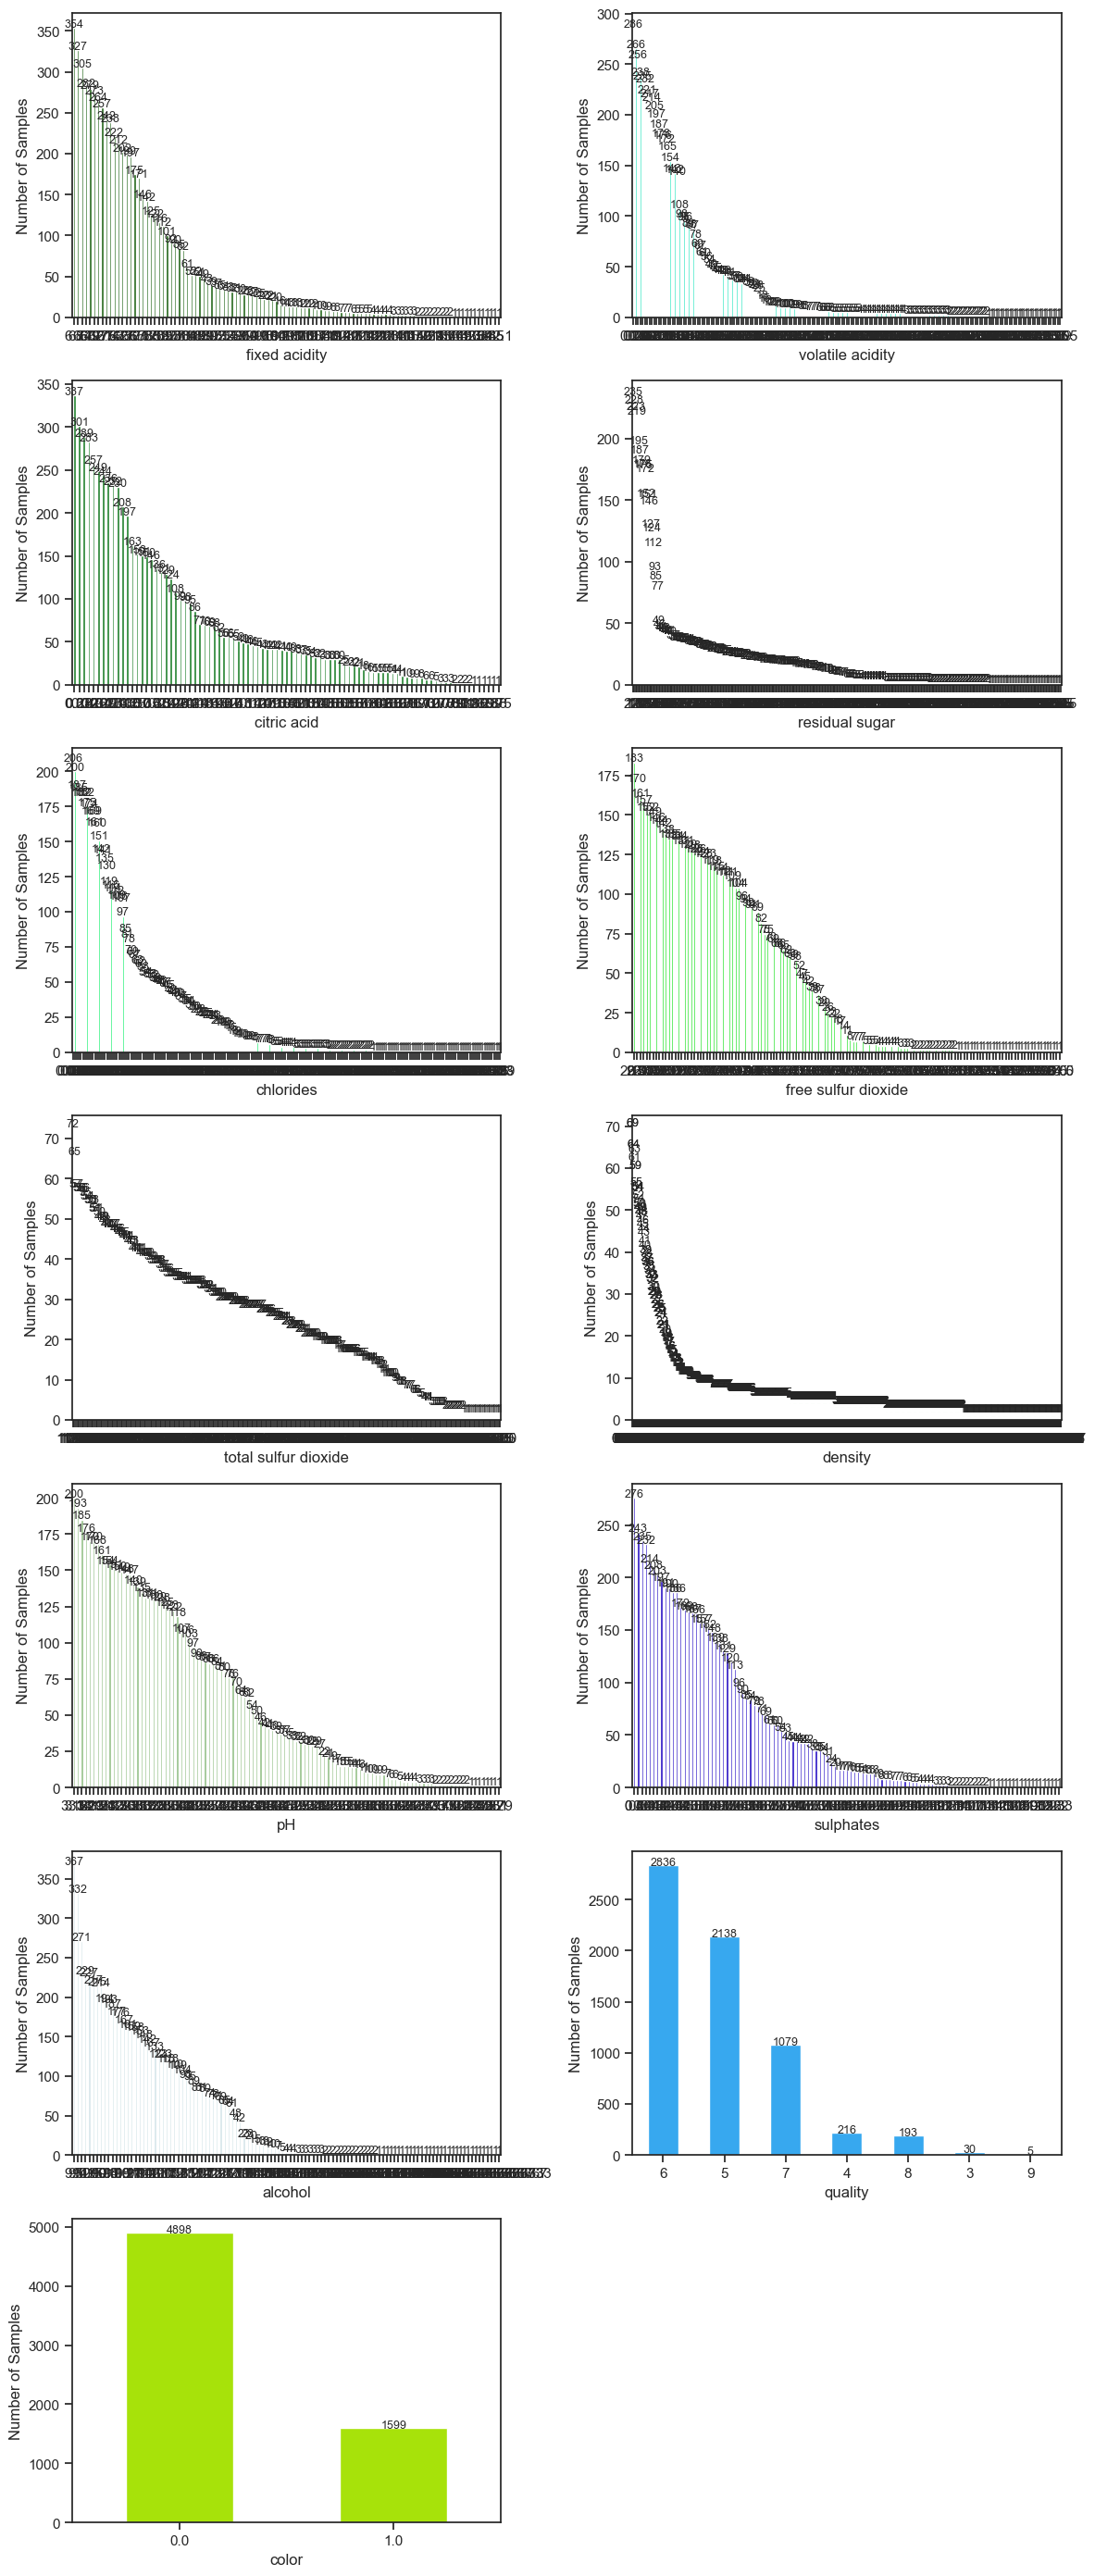

In [68]:
# 查看各特征的频率分布图
seem_discrete_features_counts = {col: wine[col].value_counts() for col in list(wine.columns)}


# 计算子图行数（每行 2 列，向上取整）
num_plots = len(seem_discrete_features_counts)
num_rows = math.ceil(num_plots / 2)

# 创建子图
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # 让 2D 变成 1D，方便遍历

# 定义一个函数，在柱子上方标注数值
def add_labels(ax, data):
    for idx, value in enumerate(data):
        ax.text(idx, value + 1, str(value), ha='center', fontsize=9)

# 生成随机颜色
colors = [(random.random(), random.random(), random.random()) for _ in range(len(seem_discrete_features_counts))]

# 遍历字典，同时填充子图
for ax, (title, data), color in zip(axes, seem_discrete_features_counts.items(), colors):
    data.plot(kind='bar', ax=ax, color=color)  
    ax.set_xlabel(title)
    ax.set_ylabel("Number of Samples")
    # ax.set_title(f"{title} Distribution")
    ax.tick_params(axis='x', rotation=0)
    add_labels(ax, data)

# 处理多余的空白子图
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# 调整布局
plt.tight_layout()
plt.show()


/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


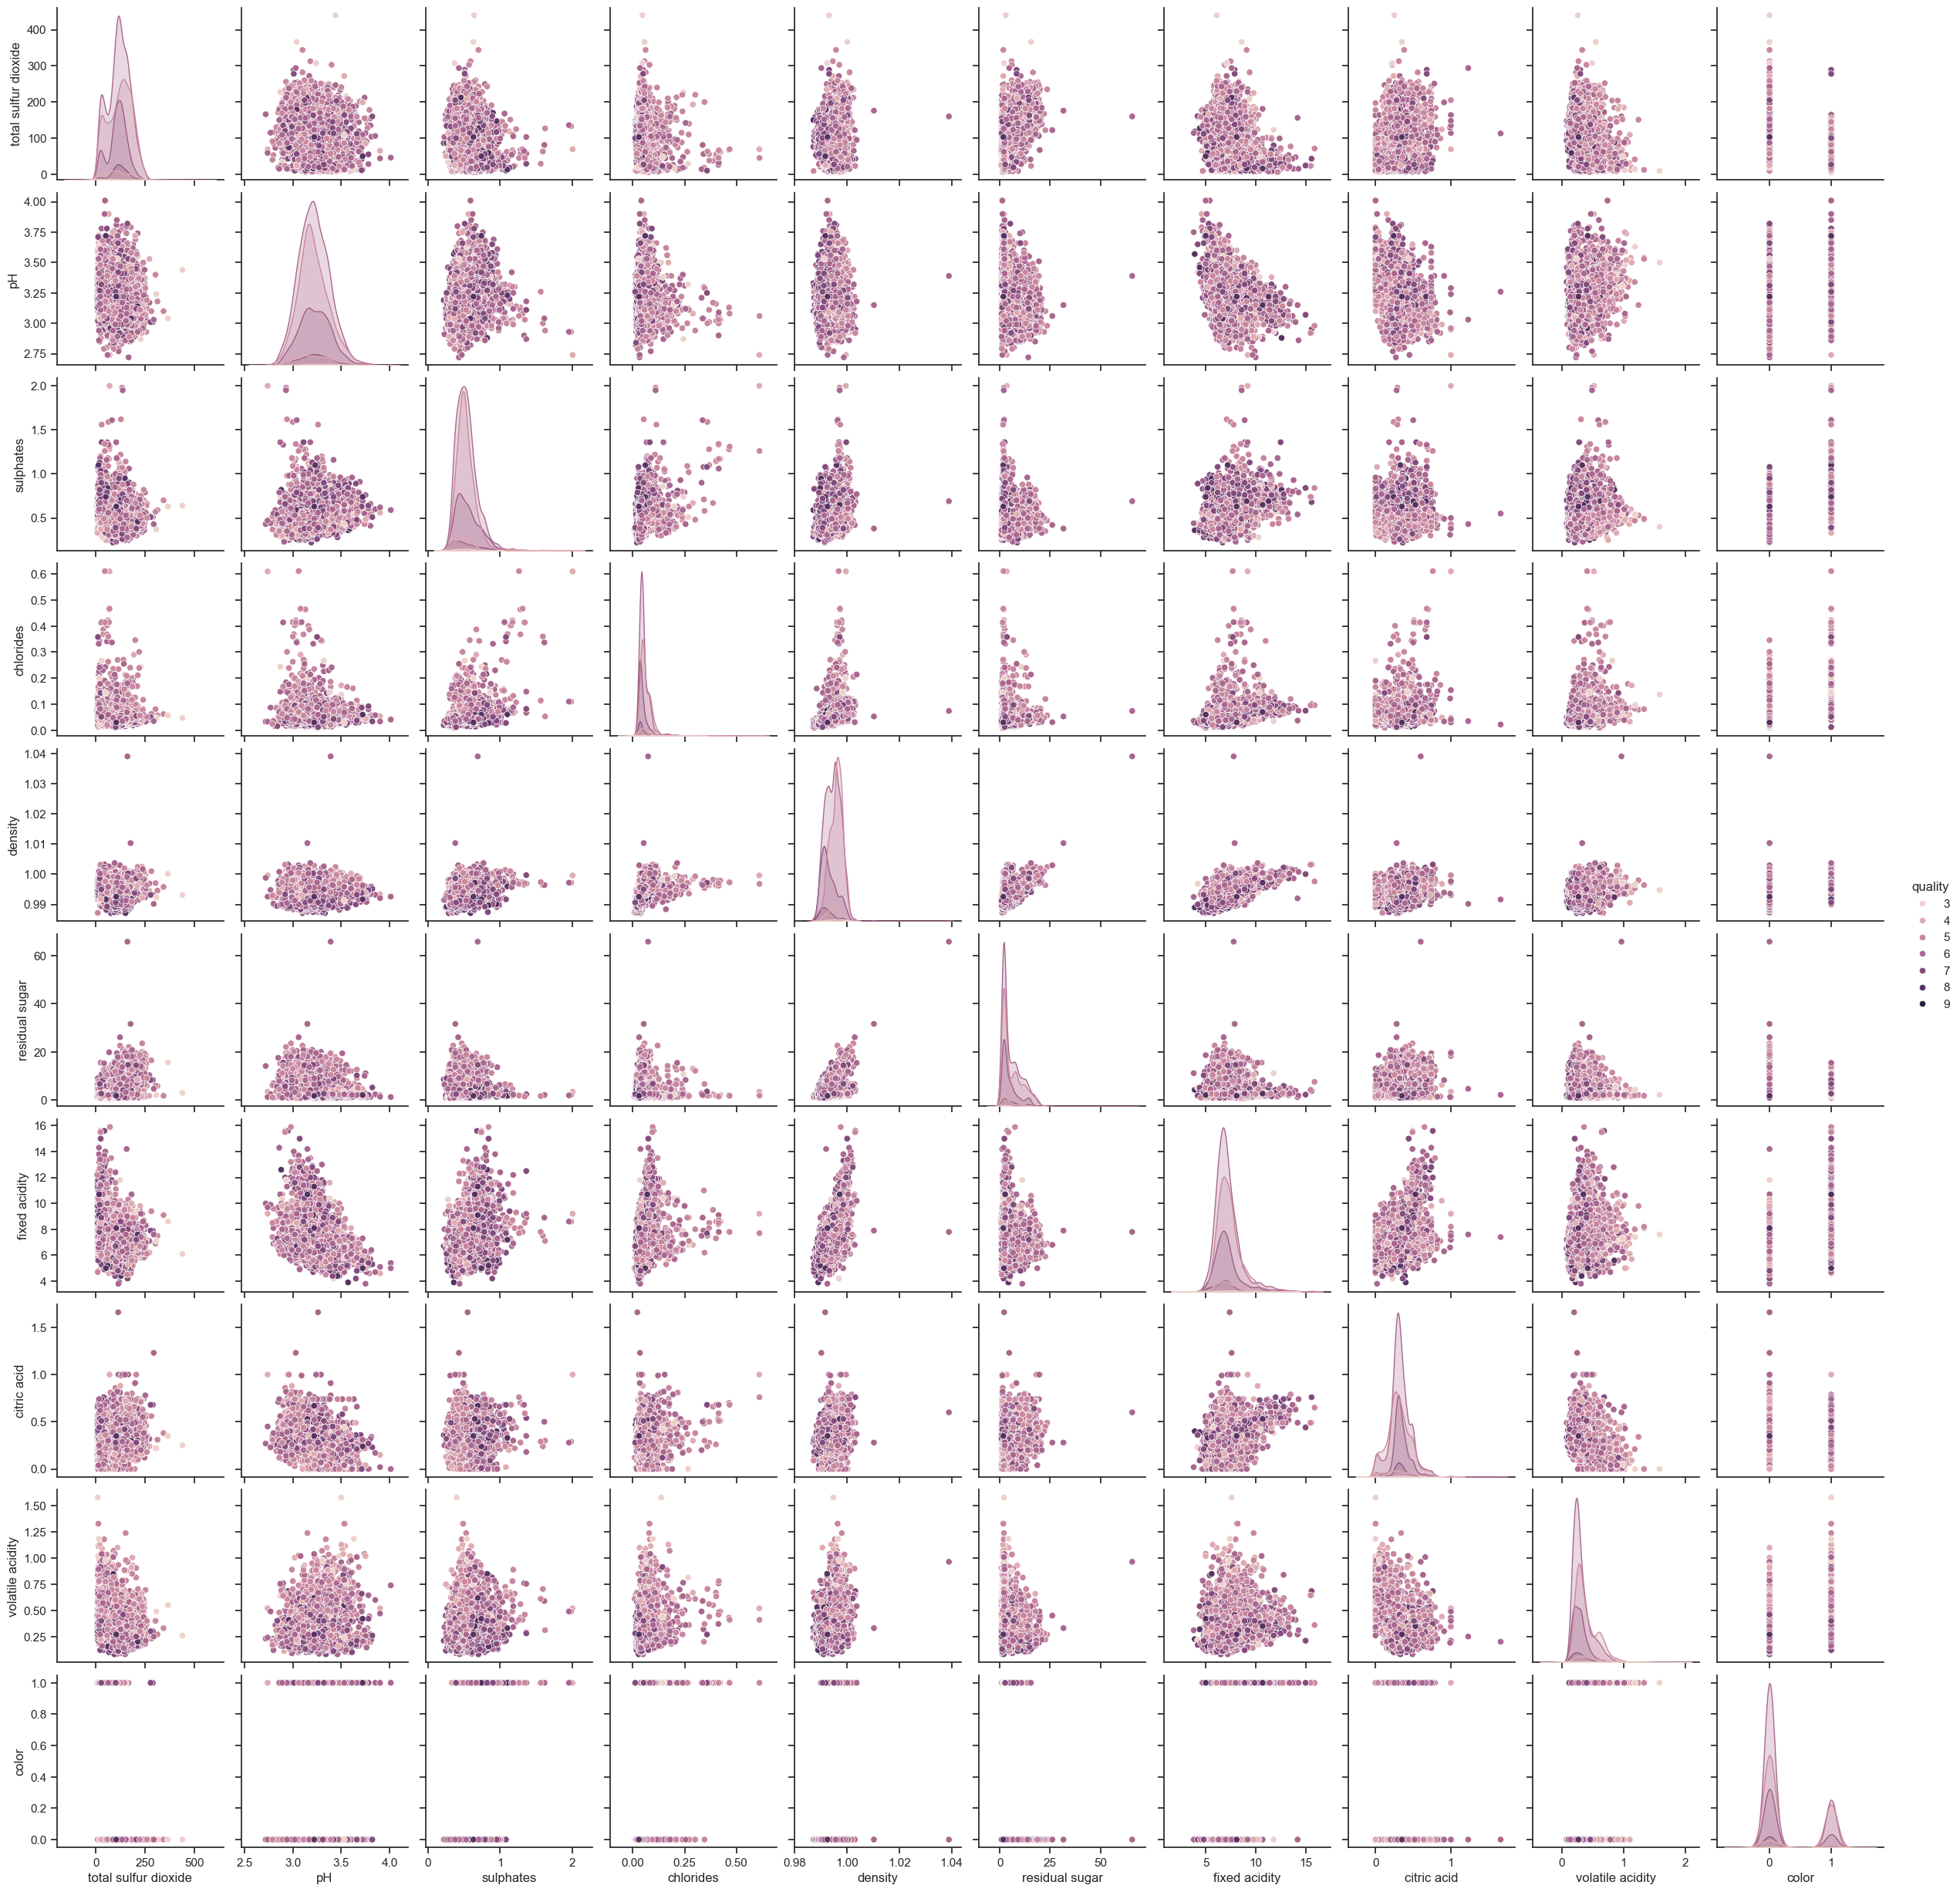

In [69]:
# plot pairsplot to see feature relations
# pairplot_feat = ['fixed acidity','volatile acidity','total sulfur dioxide','pH','color']
# pairplot_feat = list(wine.columns)
pairplot_feat = ['total sulfur dioxide', 'pH', 'sulphates', 'chlorides', 'density', 'residual sugar', 'fixed acidity', 'citric acid', 'volatile acidity','color','quality']

sampled_data = wine.sample(
                        frac=1, # randomly use part of data
                           random_state=42)[pairplot_feat]
display(sns.pairplot(sampled_data, hue = 'quality'))

In [70]:
# remove some feats, R is None meaning reserve all features
R = [
    # 'chlorides',
     # 'density',
    # 'total sulfur dioxide'
]
DC_used = [feat for feat in DC if feat not in R]
X_used, y = wine[DC_used], np.ravel(wine[L]) #labels (color)
print(f'Data: shape={X_used.shape}')
print(f'Labels: shape={y.shape}')

Data: shape=(6497, 12)
Labels: shape=(6497,)


In [71]:
X_used.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color'],
      dtype='object')

## 5. normalize features

In [72]:
# normalizations
# 0. no normalization
# X = X_used
# 1. minmax normalization
# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X_used), columns=DL_used)
# 2. z-score normalization
scaler = StandardScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X_used), columns=DC_used)

In [73]:
X_norm.shape

(6497, 12)

## 5a. one-hot encode 'color' as a feature (inserted between 5 and 6; based on assignment)

In [74]:
X_norm['color'].value_counts()

color
-0.571367    4898
 1.750190    1599
Name: count, dtype: int64

In [75]:
# one-hot encoding 
X_norm = pd.get_dummies(X_norm,columns=['color'], prefix='color', dtype=int)
X_norm

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.166089         -0.423183     0.284686        3.206929  -0.314975   
1         -0.706073         -0.240949     0.147046       -0.807837  -0.200790   
2          0.682458         -0.362438     0.559966        0.306208  -0.172244   
3         -0.011808         -0.666161     0.009406        0.642523   0.056126   
4         -0.011808         -0.666161     0.009406        0.642523   0.056126   
...             ...               ...          ...             ...        ...   
6492      -0.783214          1.581387    -1.642273       -0.723758   0.969605   
6493      -1.014636          1.277665    -1.504633       -0.681719   0.170311   
6494      -0.706073          1.034686    -1.298173       -0.660699   0.569958   
6495      -1.014636          1.854738    -1.366993       -0.723758   0.541412   
6496      -0.937495         -0.180205     1.041706       -0.387443   0.313042   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.815565              0.959976  2.102214 -1.359049   
1               -0.931107              0.287618 -0.232332  0.506915   
2               -0.029599             -0.331660  0.134525  0.258120   
3                0.928254              1.243074  0.301278 -0.177272   
4                0.928254              1.243074  0.301278 -0.177272   
...                   ...                   ...       ...       ...   
6492             0.083090             -1.269422  0.067824  1.439897   
6493             0.477500             -1.145567  0.141195  1.875288   
6494            -0.085943             -1.340197  0.347969  1.253300   
6495             0.083090             -1.269422  0.257923  2.186282   
6496            -0.705730             -1.304809  0.264593  1.066704   

      sulphates   alcohol  color_-0.571366589416845  color_1.750189840502631  
0     -0.546178 -1.418558                         1                        0  
1     -0.277351 -0.831615                         1                        0  
2     -0.613385 -0.328521                         1                        0  
3     -0.882212 -0.496219                         1                        0  
4     -0.882212 -0.496219                         1                        0  
...         ...       ...                       ...                      ...  
6492   0.327510  0.006875                         0                        1  
6493   1.537233  0.593818                         0                        1  
6494   1.470026  0.426120                         0                        1  
6495   1.201199 -0.244672                         0                        1  
6496   0.865165  0.426120                         0                        1  

[6497 rows x 13 columns]

## 6. dimensionality reduce

### 6.1 t-SNE

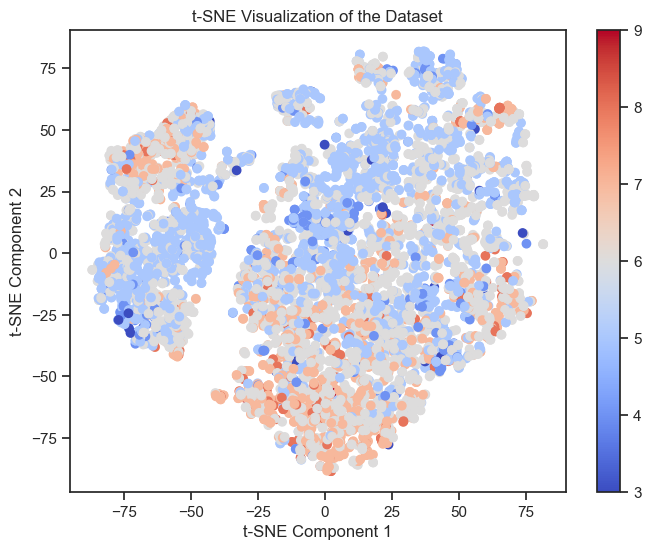

In [76]:
# **使用 tsne 进行降维**
tsne = TSNE(n_components=2,
            # metric = 'cosine',
            random_state=42, 
            perplexity=30 # numbers of neighbors
           )
X_tsne = tsne.fit_transform(X_norm)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=1)
plt.colorbar(scatter) if y is not None else None  # 如果有分类标签，则显示颜色条
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
# plt.xlim(-50,60)
# plt.ylim(-25,35)
plt.title("t-SNE Visualization of the Dataset")
plt.show()

### 6.2 PCA

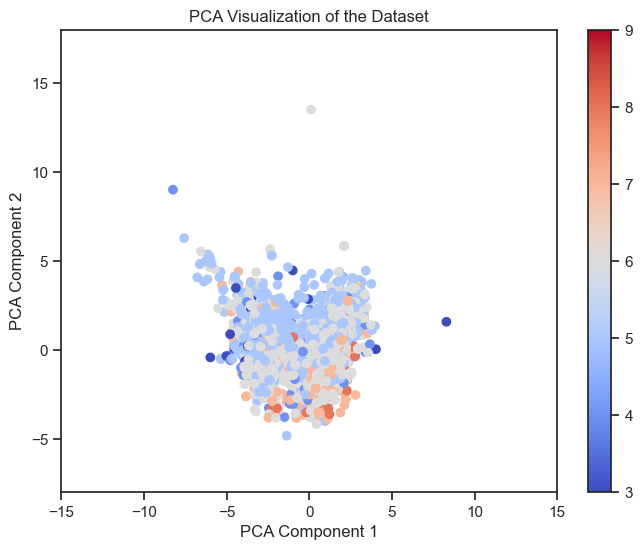

In [77]:
# **使用 PCA 进行降维**
pca = PCA(n_components=X_norm.shape[1])  
X_pca = pca.fit_transform(X_norm)
explained_variance = pca.explained_variance_ratio_
# print(f"Explained Variance: {explained_variance[0]*100:.2f}% + {explained_variance[1]*100:.2f}% = {sum(explained_variance)*100:.2f}%")


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=1)
plt.colorbar(scatter) if y is not None else None  # 如果有分类标签，则显示颜色条
# plt.xlim(-4, 10)  
# plt.ylim(-4, 8) 
plt.xlim(-15, 15)  
plt.ylim(-8, 18)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of the Dataset")
plt.show()

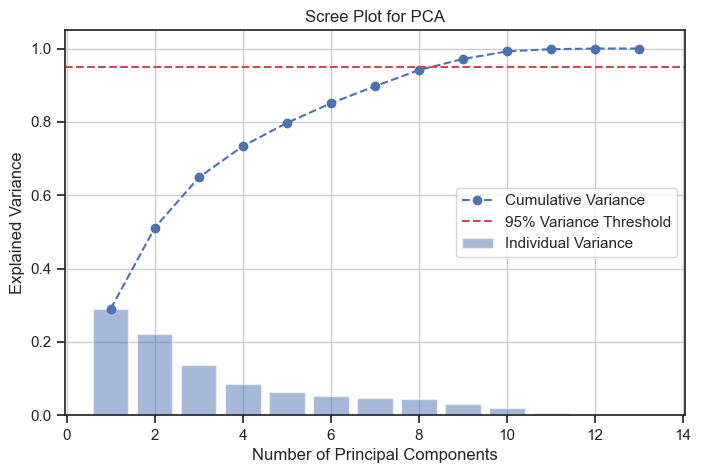

In [78]:
# **5️⃣  计算方差贡献**
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# **6️⃣  画 Scree Plot（碎石图）**
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label="Individual Variance")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")  # 设定阈值
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot for PCA")
plt.legend()
plt.grid()
plt.show()

In [79]:
X_pca_selected = X_pca[:,:9]
X_pca_selected 

array([[ 2.43897186,  3.33498094, -0.68262941, ...,  0.82758353,
         0.76600086,  0.15854851],
       [ 0.03288287, -0.52998768, -0.32827965, ...,  0.02018666,
        -0.32527089, -0.90506964],
       [ 0.25181651,  0.37228205,  0.47148073, ..., -0.5299601 ,
         0.00999175,  0.30765169],
       ...,
       [-2.45615115, -0.61585356, -1.54826677, ...,  0.5059648 ,
         0.01694691,  0.33881293],
       [-2.66667616, -0.60516501, -2.59212947, ..., -0.22281429,
        -0.03219873, -0.15162789],
       [-1.47100273, -0.45881051,  0.18052308, ...,  0.15692539,
         0.93103229, -0.18738348]])

### 6.3 ISOMAP

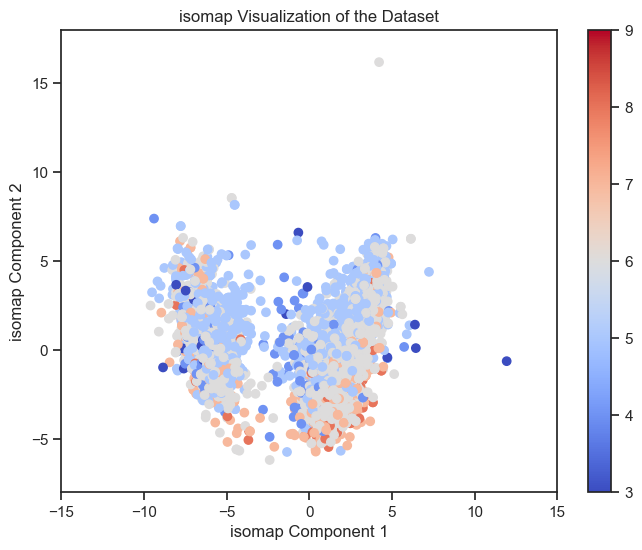

In [80]:
# Isomap
isomap = Isomap(n_components=X_norm.shape[1],
                n_neighbors=30)
X_isomap = isomap.fit_transform(X_norm)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='coolwarm', alpha=1)
plt.colorbar(scatter) if y is not None else None  # 如果有分类标签，则显示颜色条
plt.xlim(-15, 15)  
plt.ylim(-8, 18) 
plt.xlabel("isomap Component 1")
plt.ylabel("isomap Component 2")
plt.title("isomap Visualization of the Dataset")
plt.show()

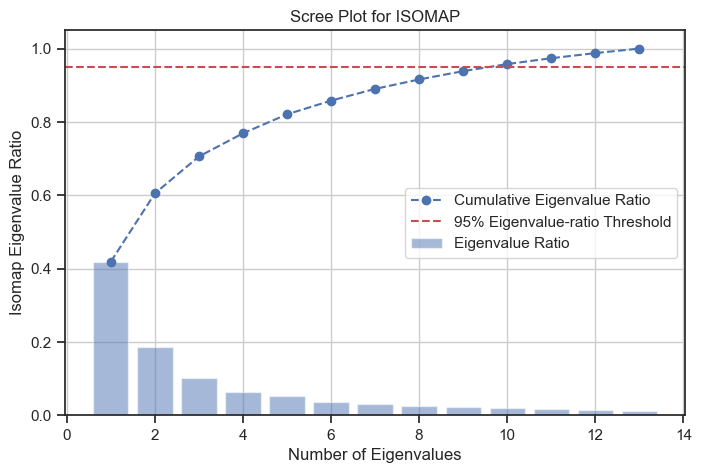

In [81]:
# **5️⃣  计算eigenvalues贡献**
isomap_evals = isomap.kernel_pca_.eigenvalues_
isomap_evals_ratios = [ev/sum(isomap_evals) for ev in isomap_evals]
cumulative_evals_ratios = np.cumsum(isomap_evals_ratios)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# **6️⃣  画 Scree Plot（碎石图）**
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(isomap_evals_ratios) + 1), cumulative_evals_ratios, marker='o', linestyle='--', label="Cumulative Eigenvalue Ratio")
plt.bar(range(1, len(isomap_evals_ratios) + 1), isomap_evals_ratios, alpha=0.5, label="Eigenvalue Ratio")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Eigenvalue-ratio Threshold")  # 设定阈值
plt.xlabel("Number of Eigenvalues")
plt.ylabel("Isomap Eigenvalue Ratio")
plt.title("Scree Plot for ISOMAP")
plt.legend()
plt.grid()
plt.show()

In [82]:
X_isomap_selected = X_isomap[:,:10]
X_isomap_selected

array([[ 4.15671471,  5.0417556 , -0.20956623, ...,  0.80383406,
         1.14325545, -1.21044519],
       [-0.11005394, -0.37596895, -0.30886031, ..., -0.02976675,
        -0.28441814, -0.58782075],
       [ 1.19697265,  0.5263181 ,  0.48534266, ..., -0.22588598,
         0.284312  ,  0.60048798],
       ...,
       [-5.70683731, -1.26951622, -1.97671725, ...,  0.80756311,
        -0.14597514,  0.20614405],
       [-5.78658273, -1.40139407, -3.49407398, ..., -0.16165281,
         0.32272251, -0.40157934],
       [-4.46667619, -1.24282927,  1.64312729, ..., -0.78103367,
        -1.19161742, -1.30475441]])

## 7. Create Train/Test Split 

In [83]:
# X_norm
# X_pca_selected = X_pca[:,:9]
# X_isomap_selected = X_isomap[:,:10]


# ran = 42 # gurantee there is same train dataset and test dataset
# train_size = .8
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

## 8. model fit

### 8.1 KNN

In [84]:
# knn original data 
# k-fold cross validation and get best super-paramater

X = X_norm

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

k_values = range(1,51)
cv_scores = []
for k in k_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=5, scoring='neg_root_mean_squared_error')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print('best_k = ', best_k)


# use best k to fit knn on train dataset & predict on test dataset & eval
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k,
                                     # weights='distance'
                                    )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print(f'RMSE: {rmse:.4f}')

best_k =  15
RMSE: 0.7671


In [85]:
# knn pca data 
# k-fold cross validation and get best super-paramater

X = X_pca_selected

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

k_values = range(1,51)
cv_scores = []
for k in k_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=5, scoring='neg_root_mean_squared_error')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print('best_k = ', best_k)


# use best k to fit knn on train dataset & predict on test dataset & eval
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k,
                                     # weights='distance'
                                    )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print(f'RMSE: {rmse:.4f}')

best_k =  8
RMSE: 0.7845


In [86]:
# knn isomap data 
# k-fold cross validation and get best super-paramater
# find best dim of isomap
n_component_list = []
rmse_list = []
best_k_list = []
for n in range(1,X_norm.shape[1]+1):
    n_component_list.append(n)
    X_isomap_selected = X_isomap[:,:n]
    # X_isomap_selected = X_pca[:,:n]
    
    X = X_isomap_selected
    y = y
    ran = 42 # gurantee there is same train dataset and test dataset
    train_size = .8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran)
    k_values = range(1, 51)  
    cv_scores = []
    
    for k in k_values:
        knn = neighbors.KNeighborsRegressor(n_neighbors=k) 
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error') 
        cv_scores.append(scores.mean())  
    
    # find k , making RMSE best
    best_k = k_values[np.argmax(cv_scores)]
    best_k_list.append(best_k)
    knn = neighbors.KNeighborsRegressor(n_neighbors= best_k,
                                     # weights='distance'
                                    )
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_list.append(round(rmse,4))
    

print(f'min RMSE: {min(rmse_list):.4f}') 
print('best dim:',n_component_list[np.argmin(rmse_list)])
print('best k:',best_k_list[np.argmin(rmse_list)])


min RMSE: 0.6786
best dim: 8
best k: 31


### 8.2 RandomForest

In [87]:
# rfr original data 
# k-fold cross validation and get best super-paramater

X = X_norm

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 3, 5, 10, None],  
    'n_estimators': [10, 50, 100, 200]  
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))


results = pd.DataFrame(grid_search.cv_results_)

results['mean_test_score'] = -results['mean_test_score']

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"rmse: {rmse:.4f}")

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best validation RMSE: 0.629
rmse: 0.5609


In [88]:
# rfr pca data 
# k-fold cross validation and get best super-paramater

X = X_pca_selected

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 3, 5, 10, None],  
    'n_estimators': [10, 50, 100, 200]  
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))



# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

results['mean_test_score'] = -results['mean_test_score']

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"rmse: {rmse:.4f}")

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best validation RMSE: 0.6401
rmse: 0.5822


In [89]:
# rfr isomap data 
# k-fold cross validation and get best super-paramater

rf_best_para_score = []
for n in range(1,X_norm.shape[1]+1):
    RF_best = dict()
    RF_best['dim'] = n
    n_component_list.append(n)
    X_isomap_selected = X_isomap[:,:n]
    # X_isomap_selected = X_pca[:,:n]
    
    X = X_isomap_selected
    y = y
    ran = 42 # gurantee there is same train dataset and test dataset
    train_size = .8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran)
    k_values = range(1, 51)  
    cv_scores = []

    rfr = RandomForestRegressor(random_state=42)

    param_grid = {
        'max_depth': [2, 3, 5, 10, None],  
        'n_estimators': [10, 50, 100, 200]  
    }
    
    grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    RF_best['best RF para'] = grid_search.best_params_
    # print("Best parameters:", grid_search.best_params_)
    # print("Best validation RMSE:", round(-grid_search.best_score_, 4))
    
    results = pd.DataFrame(grid_search.cv_results_)
    best_rf = grid_search.best_estimator_
    
    y_pred = best_rf.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print(f"rmse: {rmse:.4f}")
    RF_best['RMSE on testdata'] = rmse
    
    # rmse_list.append(round(rmse,4))
    
    # print(f'RMSE: {rmse:.4f}') 
    rf_best_para_score.append(RF_best)
  
  
# print(rf_best_para_score)

minscore = 9999
best_dim = 0
best_para = dict()
for i in range(len(rf_best_para_score)):    
    if minscore > rf_best_para_score[i]['RMSE on testdata']:
        minscore = round(rf_best_para_score[i]['RMSE on testdata'],4)
        best_dim = rf_best_para_score[i]['dim']
        best_para = rf_best_para_score[i]['best RF para']

print(minscore)
print(best_dim)
print(best_para)

0.5982
7
{'max_depth': None, 'n_estimators': 200}


## 8.3 GradientBoostingRegressor

In [90]:
# gbr original data 
# k-fold cross validation and get best super-paramater

X = X_norm

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

gbr = GradientBoostingRegressor(random_state=42)


param_grid = {
    'max_depth': [2, 3, 5, 10],  
    'n_estimators': [10, 50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2]  
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))

results = pd.DataFrame(grid_search.cv_results_)

# 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']

# 选择最佳模型
best_gbr = grid_search.best_estimator_

# 在测试集上进行预测
y_pred = best_gbr.predict(X_test)

# 计算 RMSE（如果使用了 log1p，需要还原）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best validation RMSE: 0.6503
Test RMSE: 0.5854


In [91]:
# gbr pca data 
# k-fold cross validation and get best super-paramater

X = X_pca_selected

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

# 初始化 GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# 定义超参数网格
param_grid = {
    'max_depth': [2, 3, 5, 10],  
    'n_estimators': [10, 50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2]  
}

# 交叉验证搜索最佳超参数
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数和验证集上的 RMSE
print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))

# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']

# # 显示超参数调优结果
# display(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
#         .sort_values(by='rank_test_score')
#         .rename(columns={'mean_test_score': 'mean_RMSE_CV', 'std_test_score': 'StandardDeviation_RMSE_CV'}))

# 选择最佳模型
best_gbr = grid_search.best_estimator_

# 在测试集上进行预测
y_pred = best_gbr.predict(X_test)

# 计算 RMSE（如果使用了 log1p，需要还原）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best validation RMSE: 0.657
Test RMSE: 0.6021


In [92]:
# gbr isomap data 
# k-fold cross validation and get best super-paramater

gb_best_para_score = []  # 用于存储不同维度下的最佳超参数和 RMSE

for n in range(1, X_norm.shape[1] + 1):
    GB_best = dict()
    GB_best['dim'] = n

    # 选择前 n 维的 Isomap 降维特征
    X_isomap_selected = X_isomap[:, :n]
    
    # 定义 X 和 y
    X = X_isomap_selected
    y = y

    # 设定随机种子，保证可复现
    ran = 42
    train_size = 0.8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=ran)

    # 定义 GradientBoostingRegressor
    gbr = GradientBoostingRegressor(random_state=42)

    # 定义超参数网格
    param_grid = {
        'max_depth': [2, 3, 5, 10],
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    # 使用 GridSearchCV 进行超参数搜索
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # 记录最佳参数
    GB_best['best GB para'] = grid_search.best_params_

    # 选择最佳模型
    best_gbr = grid_search.best_estimator_

    # 在测试集上进行预测
    y_pred = best_gbr.predict(X_test)

    # 计算 RMSE（如果 y 经过 log1p，需要 expm1 还原）
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    GB_best['RMSE on testdata'] = rmse

    # 记录当前维度下的最佳结果
    gb_best_para_score.append(GB_best)

# 输出最终的超参数和 RMSE 结果
# print(gb_best_para_score)

minscore = 9999
best_dim = 0
best_para = dict()
for i in range(len(gb_best_para_score)):    
    if minscore > gb_best_para_score[i]['RMSE on testdata']:
        minscore = round(gb_best_para_score[i]['RMSE on testdata'],4)
        best_dim = gb_best_para_score[i]['dim']
        best_para = gb_best_para_score[i]['best GB para']

print(minscore)
print(best_dim)
print(best_para)

0.6026
8
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


# PART III: abalone dataset

## 1. load data

In [93]:
#Columns/Features
F = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'] 
T = 'Rings' # label/target
FT = F + [T]
#Loading Data set
abalone = pd.read_csv("./abalone.csv", sep=',',header=None, names=FT)
abalone.head(10)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
5         0.120      8  
6         0.330     20  
7         0.260     16  
8         0.165      9  
9         0.320     19

## 2. explore & describe data

In [94]:
# describe the overiew of data
print(f'Data: shape={abalone[F].shape}')
display(abalone[F].describe())
display(abalone[F].head())

Data: shape=(4177, 8)


Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight  
count     4177.000000   4177.000000  
mean         0.180594      0.238831  
std          0.109614      0.139203  
min          0.000500      0.001500  
25%          0.093500      0.130000  
50%          0.171000      0.234000  
75%          0.253000      0.329000  
max          0.760000      1.005000

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055

In [95]:
# categorical encoding for 'Sex'
# abalone['Sex'] = pd.Categorical(abalone['Sex']).codes
# abalone.head()

# onehot encoding for 'Sex'
one_hot = pd.get_dummies(abalone['Sex'], prefix='Sex')
one_hot = one_hot.astype(int)
abalone = pd.concat([abalone.drop('Sex', axis=1), one_hot], axis=1)
F = [col for col in list(abalone.columns) if col != T]
print(F)
abalone.head()

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']


Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

In [96]:
abalone[T]

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [97]:
display(abalone[T].value_counts()) # label distribution

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

## 3. cleanse abnormal and address null data

In [98]:
abalone.isnull().sum()
# no null data

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

In [99]:
# check abnormal max/min val
i = 0
for col in abalone.columns:
    if col not in ['Rings','Sex']:
        i+=1; print('*'*10 + str(i) + col + '*'*10)
        wx = abalone[col].sort_values(ascending=False)
        print(pd.concat([wx.head(10), wx.tail(10)]))

**********1Length**********
1428    0.815
2334    0.800
1209    0.780
3715    0.780
2090    0.775
1763    0.775
4148    0.770
2625    0.770
1762    0.770
2624    0.765
526     0.155
2381    0.155
719     0.150
3899    0.140
1429    0.140
1986    0.135
2114    0.130
237     0.130
238     0.110
236     0.075
Name: Length, dtype: float64
**********2Diameter**********
1428    0.650
1209    0.630
2334    0.630
1763    0.630
1207    0.625
1762    0.620
3008    0.615
1427    0.610
4148    0.605
3427    0.605
526     0.110
696     0.105
1429    0.105
3837    0.105
3899    0.105
719     0.100
237     0.100
2114    0.095
238     0.090
236     0.055
Name: Diameter, dtype: float64
**********3Height**********
2051    1.130
1417    0.515
1763    0.250
1428    0.250
2179    0.250
307     0.240
1528    0.240
277     0.240
2161    0.240
3993    0.235
3190    0.025
720     0.025
719     0.025
3902    0.020
694     0.020
1174    0.015
2169    0.015
236     0.010
1257    0.000
3996    0.000
Name: Height, 

## 4. select features to be used

In [100]:
stats = {
    "Max": abalone.max(),
    "Min": abalone.min(),
    "Mean": abalone.mean(),
    "Median": abalone.median(),
    "Variance": abalone.var(),
    "Skewness": abalone.skew(),
    "Kurtosis": abalone.kurtosis()
}

stats_table = pd.DataFrame(stats)
stats_table

Max     Min      Mean  Median   Variance  Skewness  \
Length           0.8150  0.0750  0.523992  0.5450   0.014422 -0.639873   
Diameter         0.6500  0.0550  0.407881  0.4250   0.009849 -0.609198   
Height           1.1300  0.0000  0.139516  0.1400   0.001750  3.128817   
Whole weight     2.8255  0.0020  0.828742  0.7995   0.240481  0.530959   
Shucked weight   1.4880  0.0010  0.359367  0.3360   0.049268  0.719098   
Viscera weight   0.7600  0.0005  0.180594  0.1710   0.012015  0.591852   
Shell weight     1.0050  0.0015  0.238831  0.2340   0.019377  0.620927   
Rings           29.0000  1.0000  9.933684  9.0000  10.395266  1.114102   
Sex_F            1.0000  0.0000  0.312904  0.0000   0.215047  0.807302   
Sex_I            1.0000  0.0000  0.321283  0.0000   0.218113  0.765708   
Sex_M            1.0000  0.0000  0.365813  0.0000   0.232049  0.557390   

                 Kurtosis  
Length           0.064621  
Diameter        -0.045476  
Height          76.025509  
Whole weight    -0.023644  
Shucked weight   0.595124  
Viscera weight   0.084012  
Shell weight     0.531926  
Rings            2.330687  
Sex_F           -1.348909  
Sex_I           -1.414369  
Sex_M           -1.690126

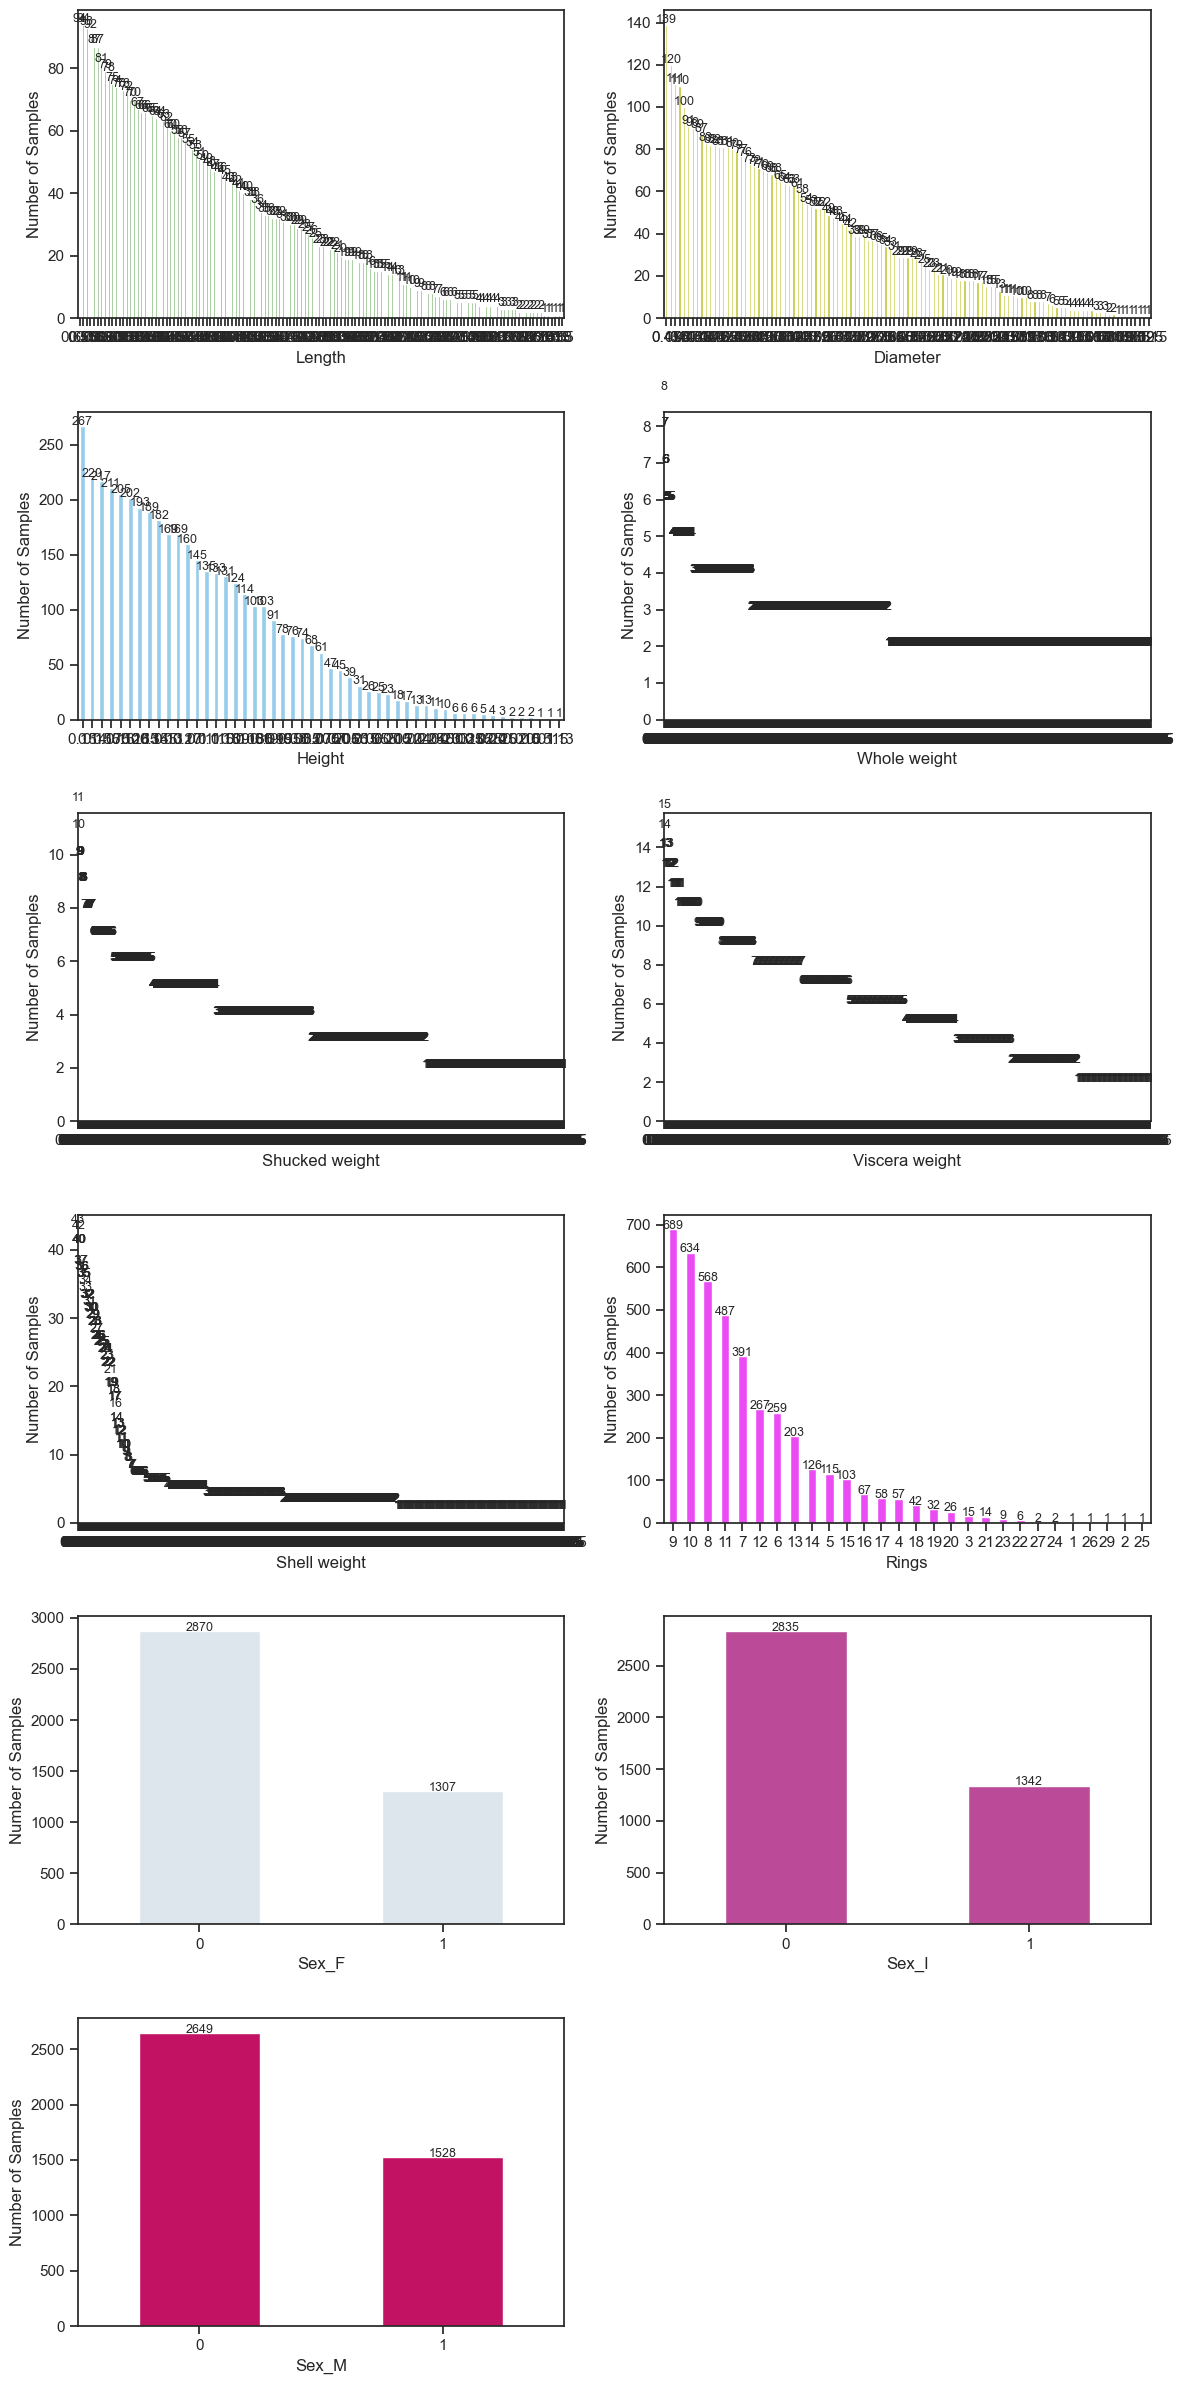

In [101]:

seem_discrete_features_counts = {col: abalone[col].value_counts() for col in list(abalone.columns)}


# 计算子图行数（每行 2 列，向上取整）
num_plots = len(seem_discrete_features_counts)
num_rows = math.ceil(num_plots / 2)

# 创建子图
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # 让 2D 变成 1D，方便遍历

# 定义一个函数，在柱子上方标注数值
def add_labels(ax, data):
    for idx, value in enumerate(data):
        ax.text(idx, value + 1, str(value), ha='center', fontsize=9)

# 生成随机颜色
colors = [(random.random(), random.random(), random.random()) for _ in range(len(seem_discrete_features_counts))]

# 遍历字典，同时填充子图
for ax, (title, data), color in zip(axes, seem_discrete_features_counts.items(), colors):
    data.plot(kind='bar', ax=ax, color=color)  
    ax.set_xlabel(title)
    ax.set_ylabel("Number of Samples")
    # ax.set_title(f"{title} Distribution")
    ax.tick_params(axis='x', rotation=0)
    add_labels(ax, data)

# 处理多余的空白子图
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# 调整布局
plt.tight_layout()
plt.show()


/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


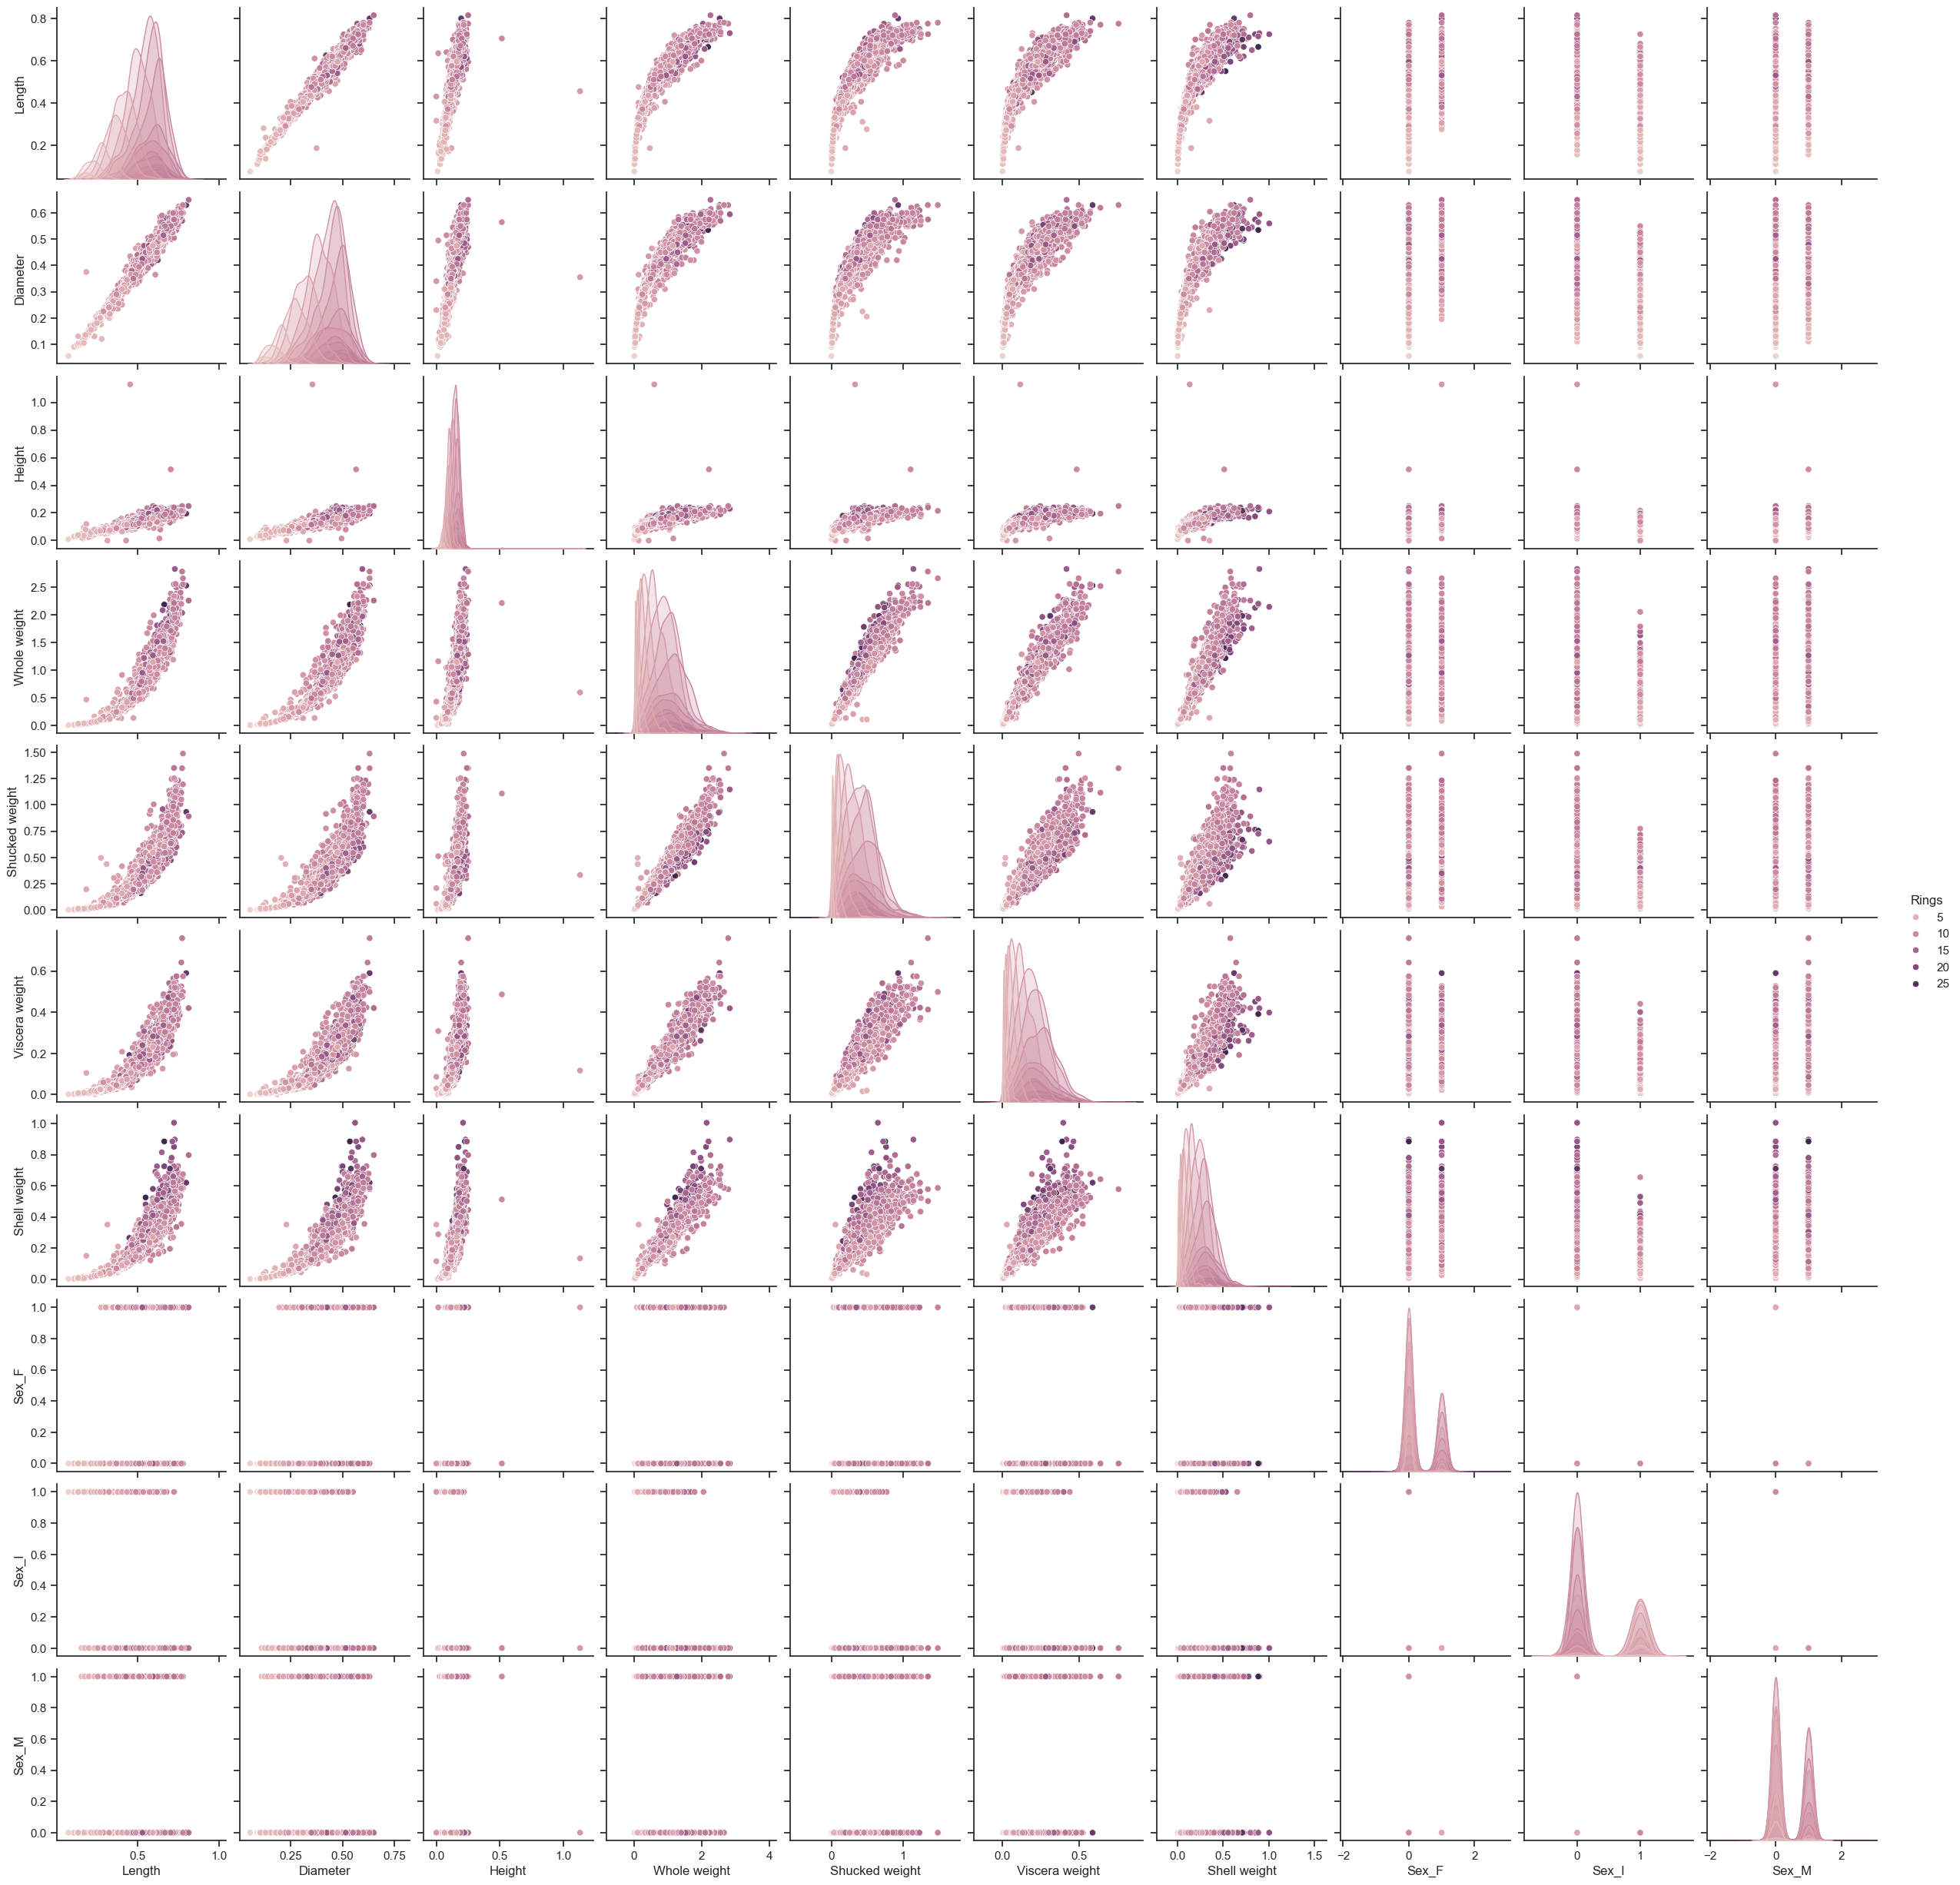

In [102]:
pairplot_feat = list(abalone.columns)

sampled_data = abalone.sample(
                        frac=1, # randomly use part of data
                           random_state=42)[pairplot_feat]
display(sns.pairplot(sampled_data
                     , hue = 'Rings'
                    ))

In [103]:
# remove some feats, R is None meaning reserve all features
R = [
    # 'chlorides',
     # 'density',
    # 'total sulfur dioxide'
]
F_used = [feat for feat in F if feat not in R and feat != T]
X_used, y = abalone[F_used], np.ravel(abalone[T]) #labels (color)
print(f'Data: shape={X_used.shape}')
print(f'Labels: shape={y.shape}')
X_used.columns

Data: shape=(4177, 10)
Labels: shape=(4177,)


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

## 5. normalize features

In [104]:
# different normalization
# 0. no normalization
# X = X_used
# 1. minmax normalization
# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X_used), columns=F_used)
# 2. z-score normalization
scaler = StandardScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X_used), columns=F_used)

In [105]:
X_norm.shape

(4177, 10)

## 6. dimensionality reduce

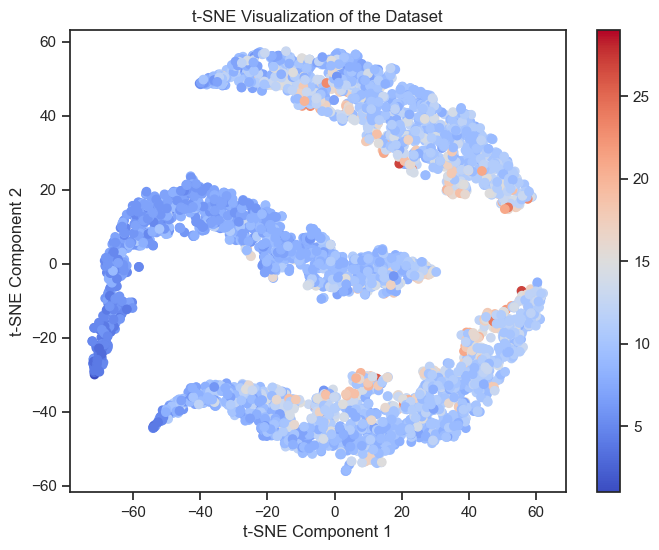

In [106]:
# **使用 tsne 进行降维**
tsne = TSNE(n_components=2,
            # metric = 'cosine',
            random_state=42, 
            perplexity=30 # numbers of neighbors
           )
X_tsne = tsne.fit_transform(X_norm)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=1)
plt.colorbar(scatter) if y is not None else None  # 如果有分类标签，则显示颜色条
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
# plt.xlim(-50,60)
# plt.ylim(-25,35)
plt.title("t-SNE Visualization of the Dataset")
plt.show()

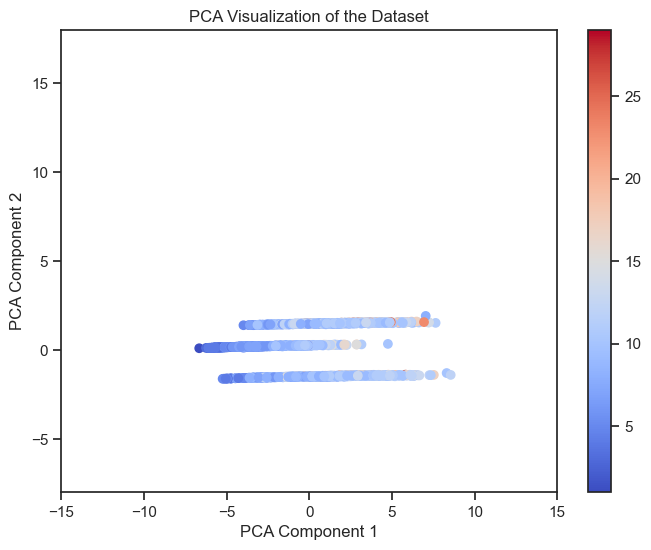

In [107]:
# **使用 PCA 进行降维**
pca = PCA(n_components=X_norm.shape[1])  
X_pca = pca.fit_transform(X_norm)
explained_variance = pca.explained_variance_ratio_
# print(f"Explained Variance: {explained_variance[0]*100:.2f}% + {explained_variance[1]*100:.2f}% = {sum(explained_variance)*100:.2f}%")


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=1)
plt.colorbar(scatter) if y is not None else None  # 如果有分类标签，则显示颜色条
# plt.xlim(-4, 10)  
# plt.ylim(-4, 8) 
plt.xlim(-15, 15)  
plt.ylim(-8, 18)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of the Dataset")
plt.show()

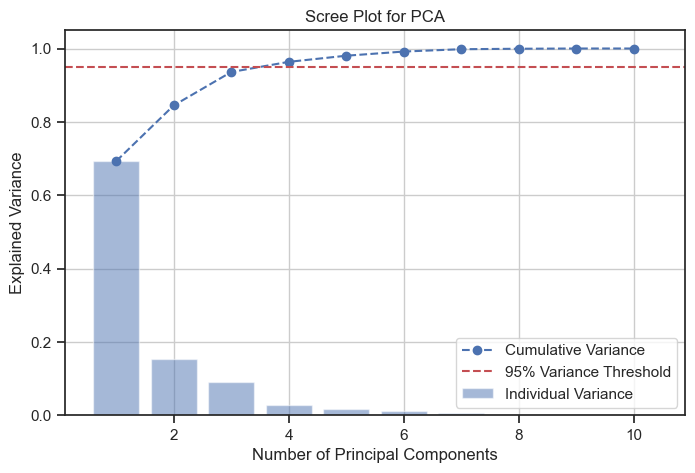

In [108]:
# **5️⃣  计算方差贡献**
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# **6️⃣  画 Scree Plot（碎石图）**
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label="Individual Variance")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")  # 设定阈值
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot for PCA")
plt.legend()
plt.grid()
plt.show()

In [109]:
X_pca_selected = X_pca[:,:4]
X_pca_selected 

array([[-1.44286204, -1.52366389, -1.151518  , -0.41201677],
       [-2.97108389, -1.54940327, -1.65218931, -0.14397865],
       [-0.16552436,  1.4843977 , -1.14727378,  0.16237663],
       ...,
       [ 2.29056034, -1.44371345,  0.0103649 ,  0.75684122],
       [ 1.85945358,  1.50185076, -0.45871938, -0.363802  ],
       [ 4.88197121, -1.44054715,  0.93819426, -0.63003819]])

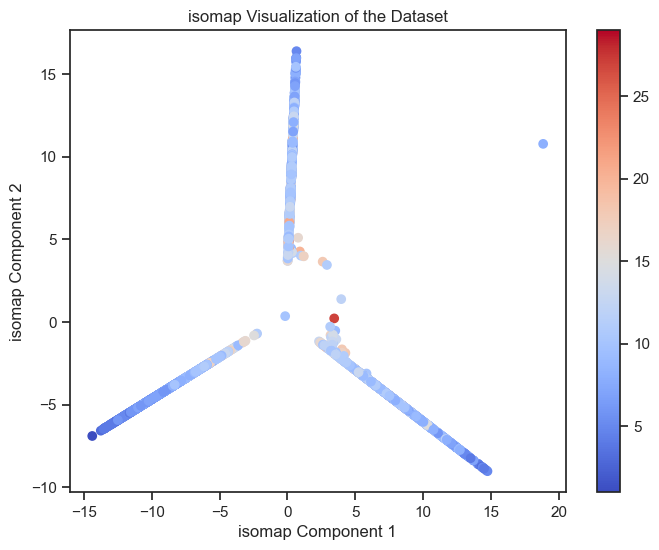

In [110]:
# Isomap
isomap = Isomap(n_components=X_norm.shape[1],
                n_neighbors=30)
X_isomap = isomap.fit_transform(X_norm)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='coolwarm', alpha=1)
plt.colorbar(scatter) if y is not None else None  # 如果有分类标签，则显示颜色条
# plt.xlim(-15, 15)  
# plt.ylim(-8, 18) 
plt.xlabel("isomap Component 1")
plt.ylabel("isomap Component 2")
plt.title("isomap Visualization of the Dataset")
plt.show()

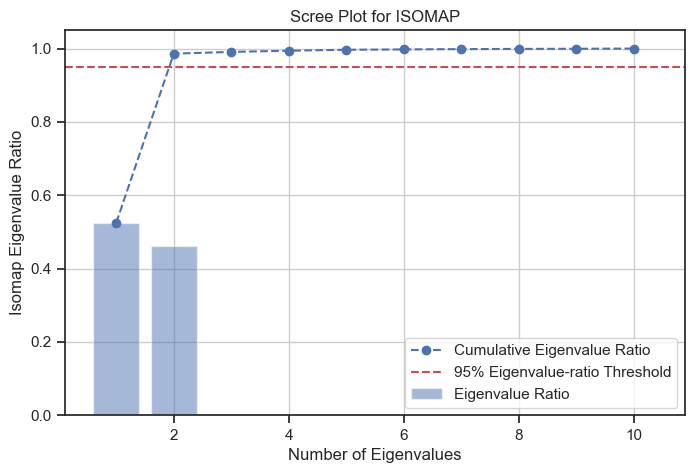

In [111]:
# **5️⃣  计算eigenvalues贡献**
isomap_evals = isomap.kernel_pca_.eigenvalues_
isomap_evals_ratios = [ev/sum(isomap_evals) for ev in isomap_evals]
cumulative_evals_ratios = np.cumsum(isomap_evals_ratios)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# **6️⃣  画 Scree Plot（碎石图）**
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(isomap_evals_ratios) + 1), cumulative_evals_ratios, marker='o', linestyle='--', label="Cumulative Eigenvalue Ratio")
plt.bar(range(1, len(isomap_evals_ratios) + 1), isomap_evals_ratios, alpha=0.5, label="Eigenvalue Ratio")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Eigenvalue-ratio Threshold")  # 设定阈值
plt.xlabel("Number of Eigenvalues")
plt.ylabel("Isomap Eigenvalue Ratio")
plt.title("Scree Plot for ISOMAP")
plt.legend()
plt.grid()
plt.show()

## 7. Create Train/Test Split 

In [112]:
# put this part into next part
# X_norm
# X_pca_selected = X_pca[:,:4]
# X_isomap_selected = X_isomap


# ran = 42 # gurantee there is same train dataset and test dataset
# train_size = .8
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

## 8. model fit

### 8.1 KNN

In [113]:
# knn original data 
# k-fold cross validation and get best super-paramater

X = X_norm

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

k_values = range(1,51)
cv_scores = []
for k in k_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=5, scoring='neg_root_mean_squared_error')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print('best_k = ', best_k)


# use best k to fit knn on train dataset & predict on test dataset & eval
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k,
                                     # weights='distance'
                                    )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ✅ 计算 RMSE
print(f'RMSE: {rmse:.4f}')

best_k =  11
RMSE: 2.6801


In [114]:
# knn pca data 
# k-fold cross validation and get best super-paramater

X = X_pca_selected

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

k_values = range(1,51)
cv_scores = []
for k in k_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=5, scoring='neg_root_mean_squared_error')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print('best_k = ', best_k)

# # plot validation acc. vs k
# plt.figure(figsize=(8, 5))
# plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Cross-Validated Accuracy')
# plt.title('KNN Validation Accuracy vs. Number of Neighbors (k)')
# plt.grid()
# plt.show()

# use best k to fit knn on train dataset & predict on test dataset & eval
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k,
                                     # weights='distance'
                                    )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ✅ 计算 RMSE
print(f'RMSE: {rmse:.4f}')

best_k =  32
RMSE: 2.8442


In [115]:
# knn isomap data 
# k-fold cross validation and get best super-paramater
# 找到isomap
n_component_list = []
rmse_list = []
best_k_list = []
for n in range(1,X_norm.shape[1]+1):
    n_component_list.append(n)
    X_isomap_selected = X_isomap[:,:n]
    # X_isomap_selected = X_pca[:,:n]
    
    X = X_isomap_selected
    y = y
    ran = 42 # gurantee there is same train dataset and test dataset
    train_size = .8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran)
    k_values = range(1, 51)  # k 值范围
    cv_scores = []
    
    for k in k_values:
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)  # KNN 回归
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')  # 使用 RMSE
        cv_scores.append(scores.mean())  # 记录平均 RMSE
    
    # 找到 RMSE 最高（负值最小，即误差最小）的 k
    best_k = k_values[np.argmax(cv_scores)]
    best_k_list.append(best_k)
    knn = neighbors.KNeighborsRegressor(n_neighbors= best_k,
                                     # weights='distance'
                                    )
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ✅ 计算 RMSE
    rmse_list.append(round(rmse,4))
    
    # print(f'RMSE: {rmse:.4f}') 
  
# print(n_component_list)
# print(rmse_list)  

print(f'min RMSE: {min(rmse_list):.4f}') 
print('best dim:',n_component_list[np.argmin(rmse_list)])
print('best k:',best_k_list[np.argmin(rmse_list)])


min RMSE: 2.3034
best dim: 9
best k: 20


### 8.2 RandomForestRegressor

In [116]:
# rfr original data 
# k-fold cross validation and get best super-paramater

X = X_norm

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 3, 5, 10, None],  
    'n_estimators': [10, 50, 100, 200]  
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))



# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# ✅ 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']
# display(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']] \
    # .sort_values(by='rank_test_score').rename(columns={'mean_test_score': 'mean_RMSE_CV', 'std_test_score': 'StandardDeviation_RMSE_CV'}))

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"rmse: {rmse:.4f}")

Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best validation RMSE: 2.1456
rmse: 2.2261


In [117]:
# rfr pca data 
# k-fold cross validation and get best super-paramater

X = X_pca_selected

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 3, 5, 10, None],  
    'n_estimators': [10, 50, 100, 200]  
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))



# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# ✅ 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']
# display(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']] \
    # .sort_values(by='rank_test_score').rename(columns={'mean_test_score': 'mean_RMSE_CV', 'std_test_score': 'StandardDeviation_RMSE_CV'}))

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"rmse: {rmse:.4f}")

Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best validation RMSE: 2.413
rmse: 2.4480


In [118]:
# rfr isomap data 
# k-fold cross validation and get best super-paramater

rf_best_para_score = []
for n in range(1,X_norm.shape[1]+1):
    RF_best = dict()
    RF_best['dim'] = n
    n_component_list.append(n)
    X_isomap_selected = X_isomap[:,:n]
    # X_isomap_selected = X_pca[:,:n]
    
    X = X_isomap_selected
    y = y
    ran = 42 # gurantee there is same train dataset and test dataset
    train_size = .8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran)
    k_values = range(1, 51)  # k 值范围
    cv_scores = []

    rfr = RandomForestRegressor(random_state=42)

    param_grid = {
        'max_depth': [2, 3, 5, 10, None],  
        'n_estimators': [10, 50, 100, 200]  
    }
    
    grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    RF_best['best RF para'] = grid_search.best_params_
    # print("Best parameters:", grid_search.best_params_)
    # print("Best validation RMSE:", round(-grid_search.best_score_, 4))
    
    # 结果存入 DataFrame
    results = pd.DataFrame(grid_search.cv_results_)
    best_rf = grid_search.best_estimator_
    
    y_pred = best_rf.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print(f"rmse: {rmse:.4f}")
    RF_best['RMSE on testdata'] = rmse
    
    # rmse_list.append(round(rmse,4))
    
    # print(f'RMSE: {rmse:.4f}') 
    rf_best_para_score.append(RF_best)
  
  
# print(rf_best_para_score)

minscore = 9999
best_dim = 0
best_para = dict()
for i in range(len(rf_best_para_score)):    
    if minscore > rf_best_para_score[i]['RMSE on testdata']:
        minscore = round(rf_best_para_score[i]['RMSE on testdata'],4)
        best_dim = rf_best_para_score[i]['dim']
        best_para = rf_best_para_score[i]['best RF para']

print(minscore)
print(best_dim)
print(best_para)

2.2806
10
{'max_depth': 10, 'n_estimators': 200}


## 8.3 GradientBoostingRegressor

In [119]:
# gbr original data 
# k-fold cross validation and get best super-paramater

X = X_norm

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

# 初始化 GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# 定义超参数网格
param_grid = {
    'max_depth': [2, 3, 5, 10],  
    'n_estimators': [10, 50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2]  
}

# 交叉验证搜索最佳超参数
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数和验证集上的 RMSE
print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))

# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']

# 显示超参数调优结果
# display(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
#         .sort_values(by='rank_test_score')
#         .rename(columns={'mean_test_score': 'mean_RMSE_CV', 'std_test_score': 'StandardDeviation_RMSE_CV'}))

# 选择最佳模型
best_gbr = grid_search.best_estimator_

# 在测试集上进行预测
y_pred = best_gbr.predict(X_test)

# 计算 RMSE（如果使用了 log1p，需要还原）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best validation RMSE: 2.1374
Test RMSE: 2.2766


In [120]:
# gbr pca data 
# k-fold cross validation and get best super-paramater

X = X_pca_selected

ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

# 初始化 GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# 定义超参数网格
param_grid = {
    'max_depth': [2, 3, 5, 10],  
    'n_estimators': [10, 50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2]  
}

# 交叉验证搜索最佳超参数
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数和验证集上的 RMSE
print("Best parameters:", grid_search.best_params_)
print("Best validation RMSE:", round(-grid_search.best_score_, 4))

# 结果存入 DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# 取反，使 RMSE 直观可读
results['mean_test_score'] = -results['mean_test_score']

# # 显示超参数调优结果
# display(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
#         .sort_values(by='rank_test_score')
#         .rename(columns={'mean_test_score': 'mean_RMSE_CV', 'std_test_score': 'StandardDeviation_RMSE_CV'}))

# 选择最佳模型
best_gbr = grid_search.best_estimator_

# 在测试集上进行预测
y_pred = best_gbr.predict(X_test)

# 计算 RMSE（如果使用了 log1p，需要还原）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Best validation RMSE: 2.4223
Test RMSE: 2.4535


In [121]:
# gbr isomap data 
# k-fold cross validation and get best super-paramater

gb_best_para_score = []  # 用于存储不同维度下的最佳超参数和 RMSE

for n in range(1, X_norm.shape[1] + 1):
    GB_best = dict()
    GB_best['dim'] = n

    # 选择前 n 维的 Isomap 降维特征
    X_isomap_selected = X_isomap[:, :n]
    
    # 定义 X 和 y
    X = X_isomap_selected
    y = y

    # 设定随机种子，保证可复现
    ran = 42
    train_size = 0.8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=ran)

    # 定义 GradientBoostingRegressor
    gbr = GradientBoostingRegressor(random_state=42)

    # 定义超参数网格
    param_grid = {
        'max_depth': [2, 3, 5, 10],
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    # 使用 GridSearchCV 进行超参数搜索
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # 记录最佳参数
    GB_best['best GB para'] = grid_search.best_params_

    # 选择最佳模型
    best_gbr = grid_search.best_estimator_

    # 在测试集上进行预测
    y_pred = best_gbr.predict(X_test)

    # 计算 RMSE（如果 y 经过 log1p，需要 expm1 还原）
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    GB_best['RMSE on testdata'] = rmse

    # 记录当前维度下的最佳结果
    gb_best_para_score.append(GB_best)

# 输出最终的超参数和 RMSE 结果
# print(gb_best_para_score)

minscore = 9999
best_dim = 0
best_para = dict()
for i in range(len(gb_best_para_score)):    
    if minscore > gb_best_para_score[i]['RMSE on testdata']:
        minscore = round(gb_best_para_score[i]['RMSE on testdata'],4)
        best_dim = gb_best_para_score[i]['dim']
        best_para = gb_best_para_score[i]['best GB para']

print(minscore)
print(best_dim)
print(best_para)

2.2809
9
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
